In [ ]:
!pip uninstall -y tensorflow


Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0


In [ ]:
!pip uninstall -y tensorflow keras


Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Successfully uninstalled keras-3.4.1


In [ ]:
!pip install tensorflow==2.14.0 keras==2.14.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: google-auth-oauthlib
    Found existing ins

In [ ]:
# prompt: google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install librosa


In [ ]:
!pip install resampy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.6 MB/s eta 0:00:00


In [ ]:
import os

# Paths
flute_path = '/content/drive/MyDrive/1.0 audio classification /flute'
gataberaya_path = '/content/drive/MyDrive/1.0 audio classification /gataberaya'

# Function to count audio files
def count_audio_files(path):
    return len([f for f in os.listdir(path) if f.endswith('.wav')])

# Count files in each path
flute_count = count_audio_files(flute_path)
gataberaya_count = count_audio_files(gataberaya_path)

print(f"Number of audio files in flute path: {flute_count}")
print(f"Number of audio files in gataberaya path: {gataberaya_count}")


Number of audio files in flute path: 168
Number of audio files in gataberaya path: 168


In [ ]:
from google.colab import drive
import numpy as np
import librosa
import os
import soundfile as sf
import random

# Paths
flute_path = '/content/drive/MyDrive/1.0 audio classification /flute'
gataberaya_path = '/content/drive/MyDrive/1.0 audio classification /gataberaya'

# Function to add noise
def add_noise(audio, noise_level=0.005):
    noise = np.random.randn(len(audio))
    audio_noisy = audio + noise_level * noise
    return audio_noisy

# Function to apply shifting
def shift_audio(audio, shift_max=0.5):
    shift = np.random.uniform(-shift_max, shift_max) * len(audio)
    return np.roll(audio, int(shift))

# Function to change pitch
def change_pitch(audio, sr, n_steps=2):
    return librosa.effects.pitch_shift(audio, sr=sr, n_steps=n_steps)

# Function to change speed
def change_speed(audio, speed_factor=1.2):
    return librosa.effects.time_stretch(audio, rate=speed_factor)

# Function to load original audio files
def load_original_audio_files(path):
    original_files = []
    for filename in os.listdir(path):
        if filename.endswith('.wav'):
            file_path = os.path.join(path, filename)
            audio, sr = librosa.load(file_path, sr=None)
            original_files.append((audio, sr))
    return original_files

# Function to apply a specific augmentation to audio files
def apply_augmentation(original_files, augmentation_fn, *args):
    augmented_files = []
    for audio, sr in original_files:
        if augmentation_fn == change_speed:
            augmented_audio = augmentation_fn(audio, *args)  # No sample rate needed for speed change
        else:
            augmented_audio = augmentation_fn(audio, sr, *args)
        augmented_files.append((augmented_audio, sr))
    return augmented_files

# Load original audio files
original_flute_files = load_original_audio_files(flute_path)
original_gataberaya_files = load_original_audio_files(gataberaya_path)

# Apply each augmentation
flute_noisy = apply_augmentation(original_flute_files, add_noise)
gataberaya_noisy = apply_augmentation(original_gataberaya_files, add_noise)

flute_shifted = apply_augmentation(original_flute_files, shift_audio)
gataberaya_shifted = apply_augmentation(original_gataberaya_files, shift_audio)

flute_pitched = apply_augmentation(original_flute_files, change_pitch, 2)  # You can vary the n_steps
gataberaya_pitched = apply_augmentation(original_gataberaya_files, change_pitch, 2)

flute_speed_changed = apply_augmentation(original_flute_files, change_speed, 1.2)  # No sample rate for speed
gataberaya_speed_changed = apply_augmentation(original_gataberaya_files, change_speed, 1.2)

# Combine original and augmented files
aug_flute = (
    original_flute_files + flute_noisy + flute_shifted + flute_pitched + flute_speed_changed
)
aug_gataberaya = (
    original_gataberaya_files + gataberaya_noisy + gataberaya_shifted + gataberaya_pitched + gataberaya_speed_changed
)

# Count files after combining
aug_flute_count = len(aug_flute)
aug_gataberaya_count = len(aug_gataberaya)

print(f"Number of combined flute files: {aug_flute_count}")
print(f"Number of combined gataberaya files: {aug_gataberaya_count}")


Number of combined flute files: 840
Number of combined gataberaya files: 840


Plotting Flute Class Spectrograms...
Plotting Gataberaya Class Spectrograms...


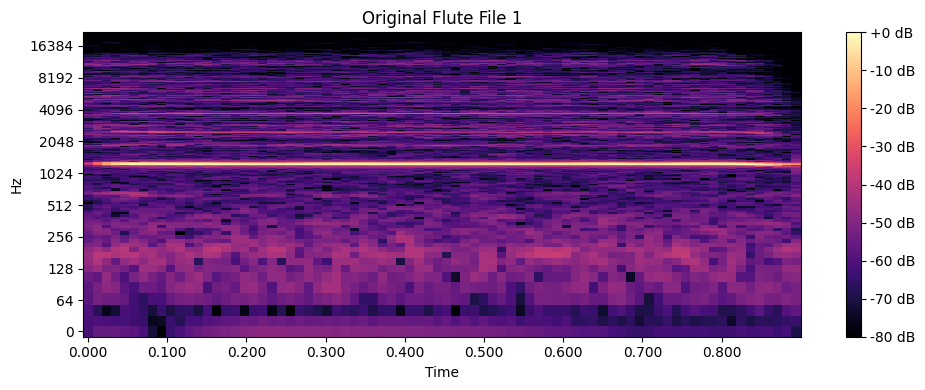

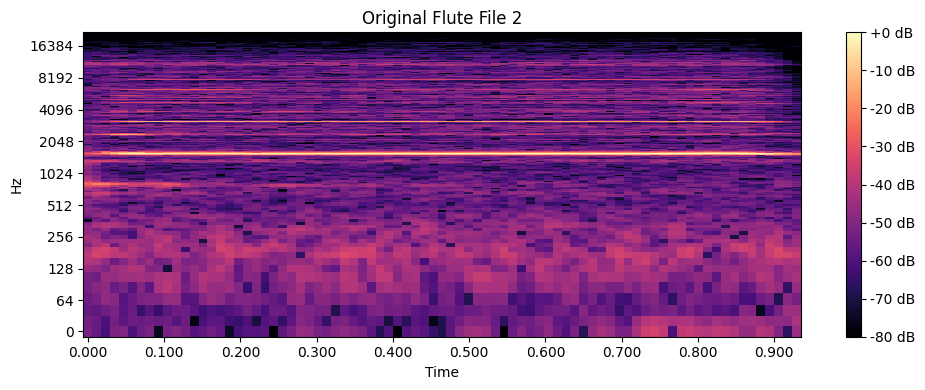

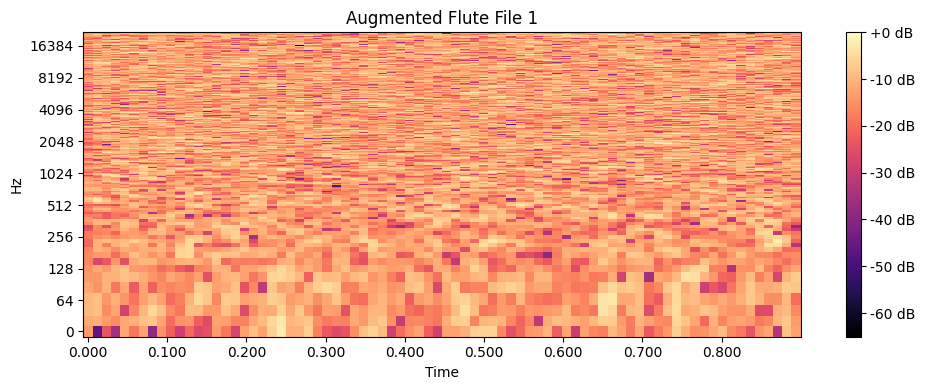

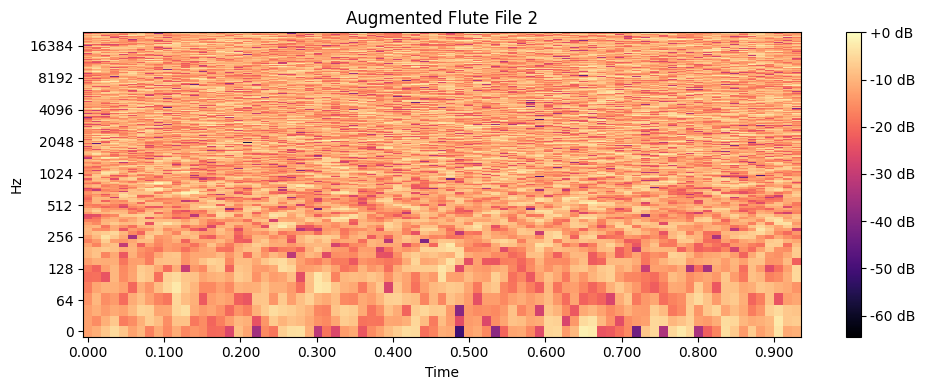

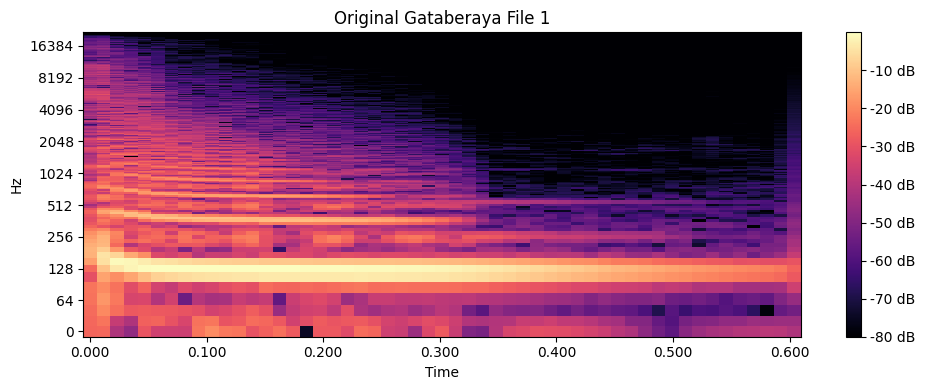

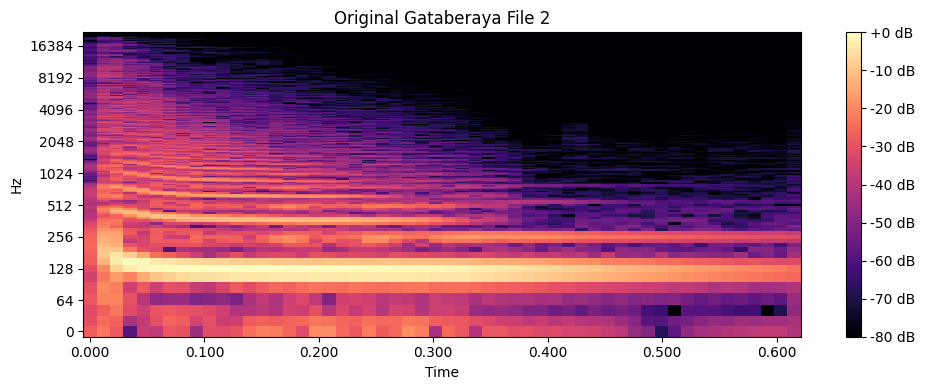

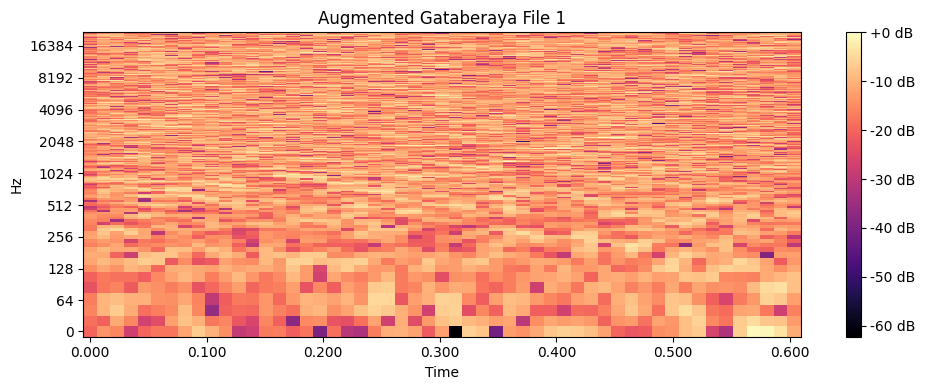

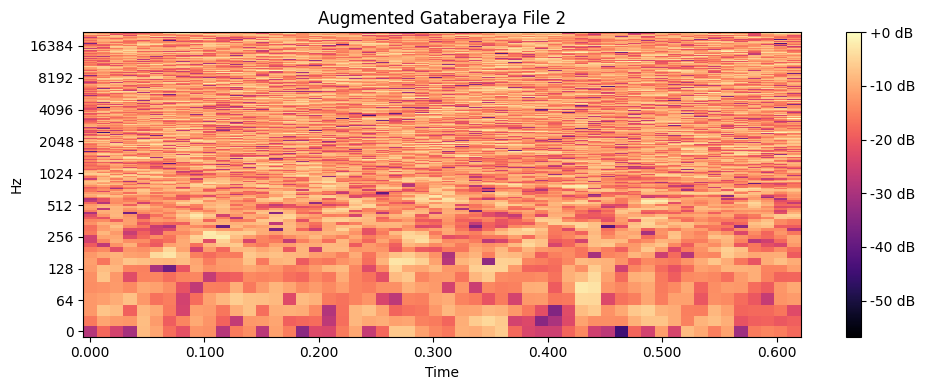

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# Function to plot spectrogram
def plot_spectrogram(audio, sr, title):
    plt.figure(figsize=(10, 4))
    spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()

# Plot spectrograms for original and augmented audios
def plot_original_and_augmented_spectrograms(original_files, augmented_files, class_name):
    # Plot 2 spectrograms from original files
    for i in range(2):
        audio, sr = original_files[i]
        plot_spectrogram(audio, sr, f"Original {class_name} File {i+1}")

    # Plot 2 spectrograms from augmented files
    for i in range(2):
        audio, sr = augmented_files[i]
        plot_spectrogram(audio, sr, f"Augmented {class_name} File {i+1}")

# Select 2 original and 2 augmented files from each class
selected_flute_originals = original_flute_files[:2]
selected_flute_augmented = flute_noisy[:2]  # You can change to flute_shifted, flute_pitched, etc.

selected_gataberaya_originals = original_gataberaya_files[:2]
selected_gataberaya_augmented = gataberaya_noisy[:2]  # You can change to gataberaya_shifted, gataberaya_pitched, etc.

# Plot flute class spectrograms
print("Plotting Flute Class Spectrograms...")
plot_original_and_augmented_spectrograms(selected_flute_originals, selected_flute_augmented, "Flute")

# Plot gataberaya class spectrograms
print("Plotting Gataberaya Class Spectrograms...")
plot_original_and_augmented_spectrograms(selected_gataberaya_originals, selected_gataberaya_augmented, "Gataberaya")

plt.show()


## Flute Spectrograms
File 257:


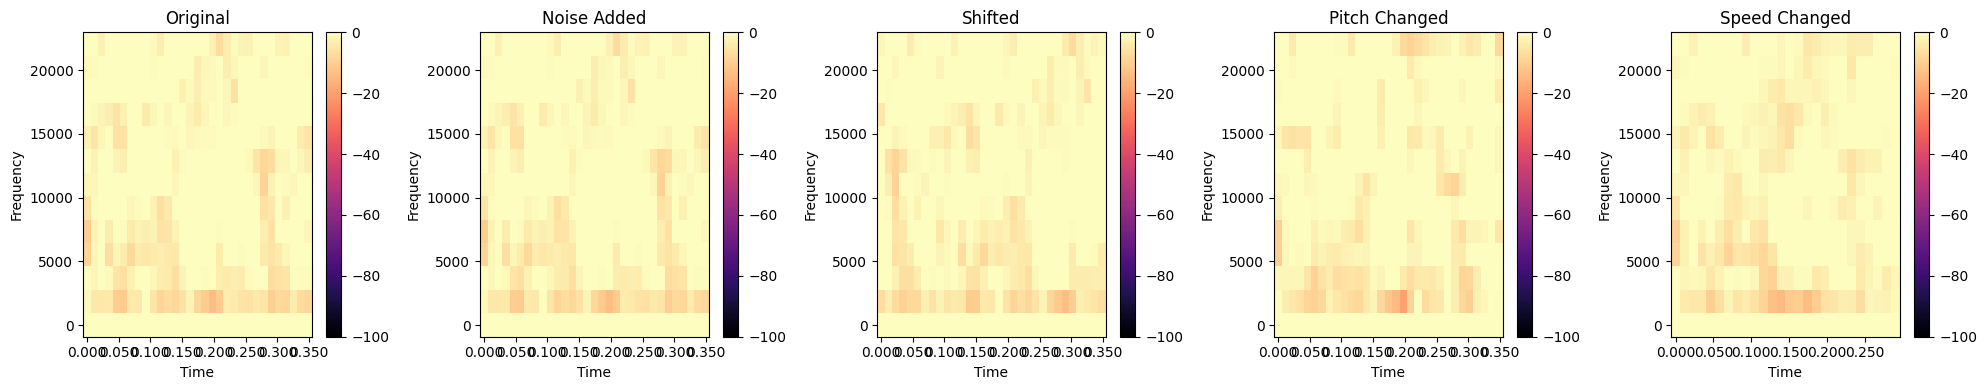

File 784:


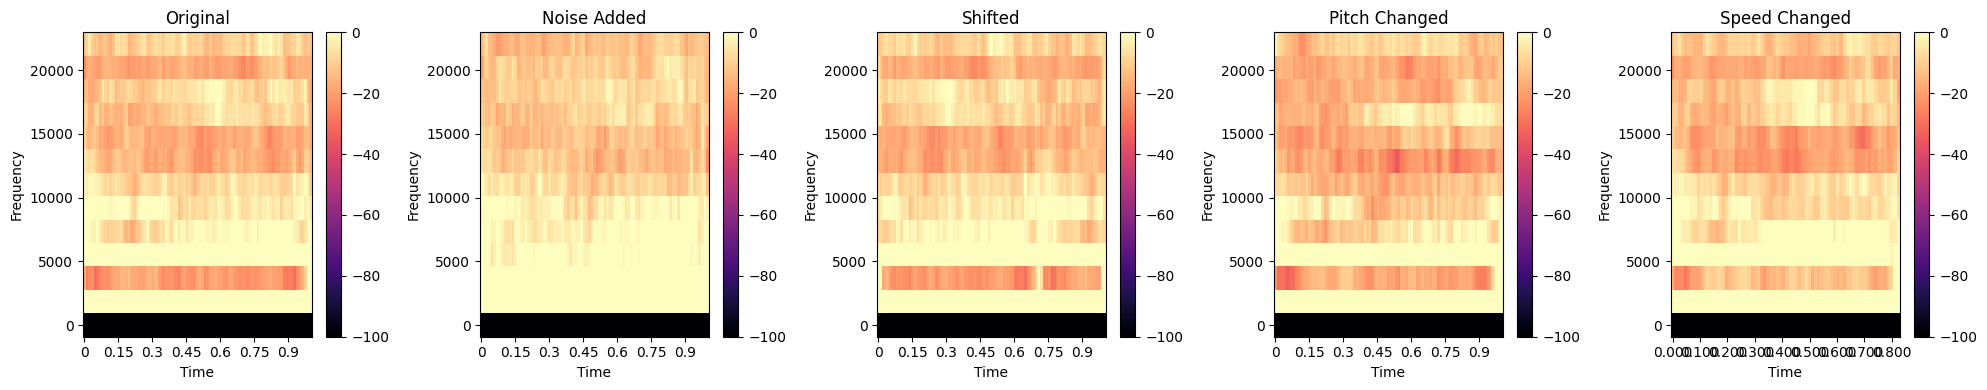

File 669:


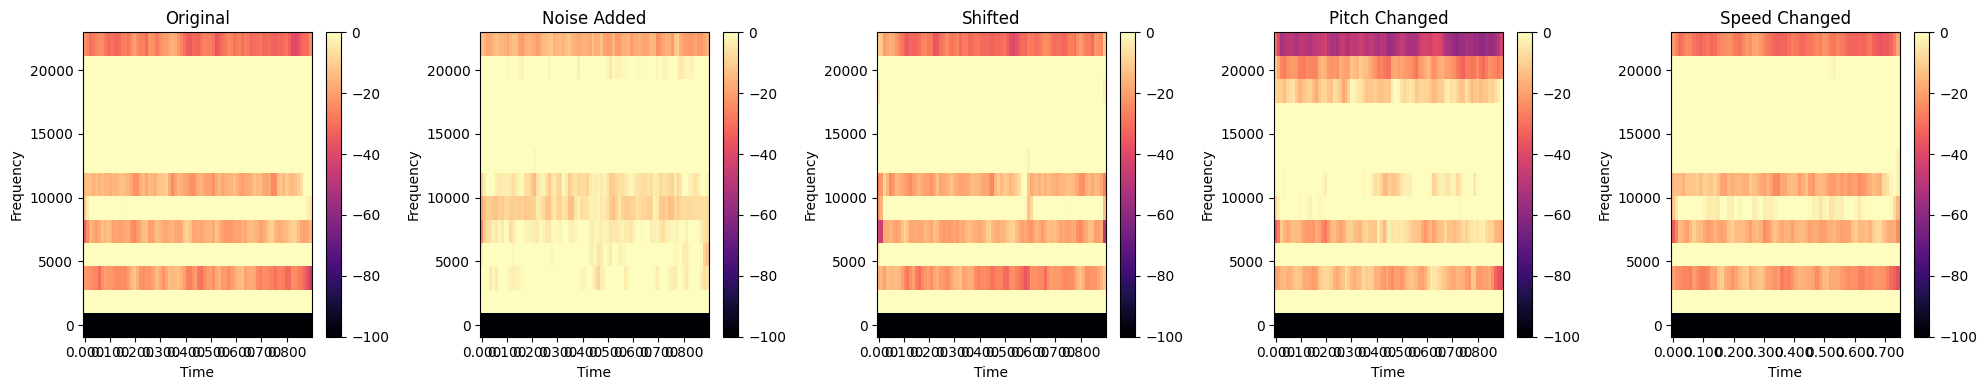


## Gataberaya Spectrograms
File 462:


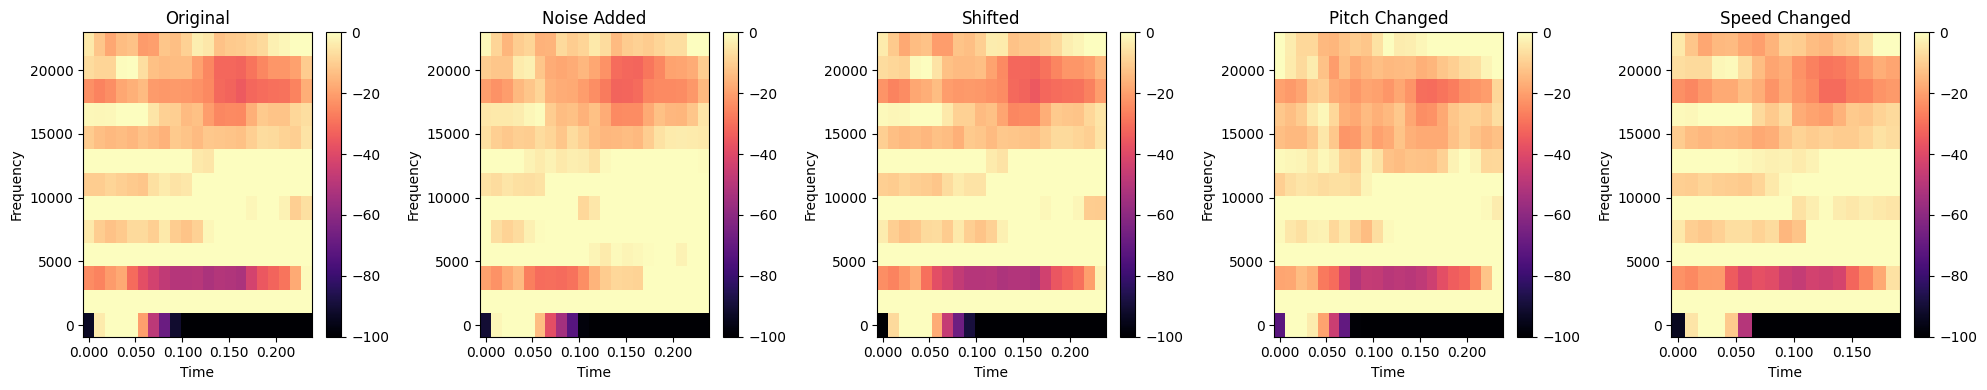

File 425:


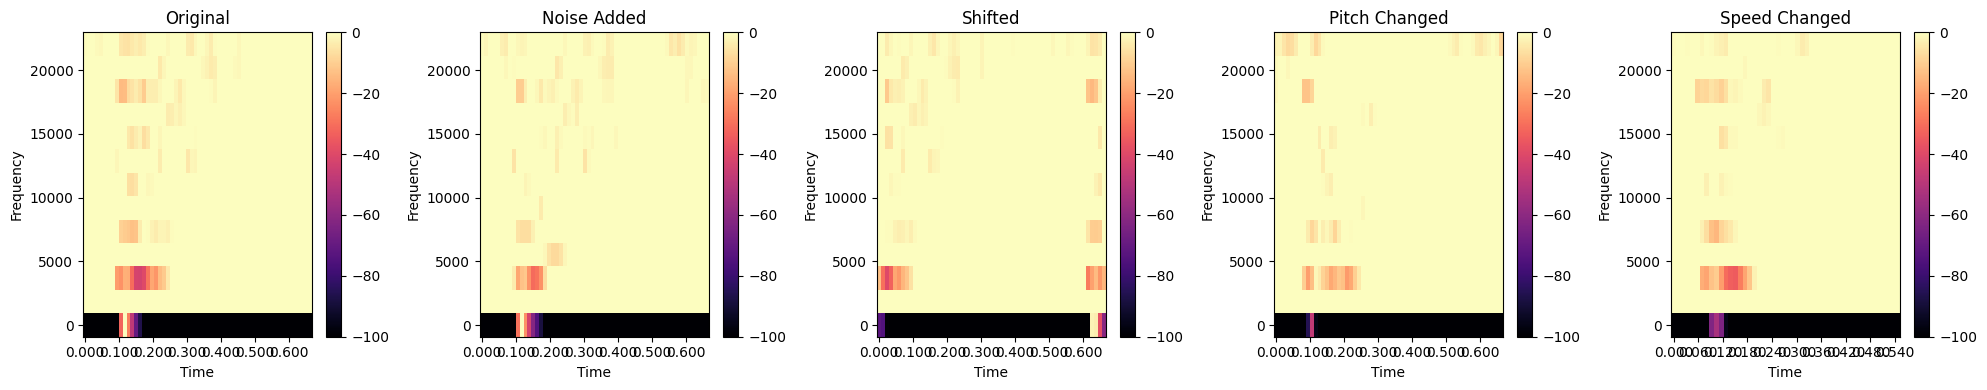

File 769:


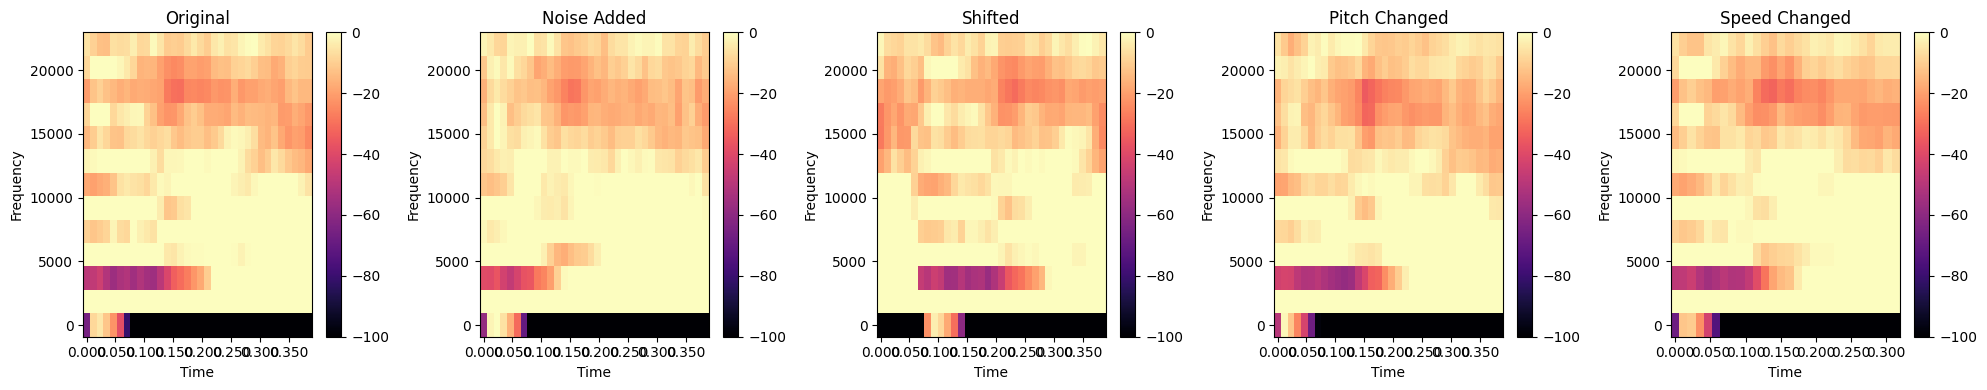

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import random

# Assuming you have the augmented audio files loaded as:
#   aug_flute = [(audio1, sr1), (audio2, sr2), ...]
#   aug_gataberaya = [(audio1, sr1), (audio2, sr2), ...]

def plot_spectrogram(audio, sr, plot_type='mfcc'):
  if plot_type == 'mfcc':
    features = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
  elif plot_type == 'mel':
    features = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
  else:
    raise ValueError("Invalid plot_type. Choose 'mfcc' or 'mel'.")

  return features

# Select 3 random audio files from each class
random_flute_indices = random.sample(range(len(aug_flute)), 3)
random_gataberaya_indices = random.sample(range(len(aug_gataberaya)), 3)

# Plot the spectrograms for flute
print("## Flute Spectrograms")
for i in random_flute_indices:
  audio, sr = aug_flute[i]
  print(f"File {i+1}:")

  # Original MFCC
  original_features = plot_spectrogram(audio, sr, plot_type='mfcc')

  # Create subplots for side-by-side comparison
  fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

  # Plot original
  librosa.display.specshow(original_features, sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                            vmin=-100, vmax=0, ax=axes[0])
  axes[0].set_title("Original")
  fig.colorbar(axes[0].get_children()[0], ax=axes[0])  # Add colorbar to subplot

  # Plot noisy
  librosa.display.specshow(plot_spectrogram(add_noise(audio), sr, plot_type='mfcc'),
                            sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                            vmin=-100, vmax=0, ax=axes[1])
  axes[1].set_title("Noise Added")
  fig.colorbar(axes[1].get_children()[0], ax=axes[1])  # Add colorbar to subplot

  # Plot shifted
  librosa.display.specshow(plot_spectrogram(shift_audio(audio), sr, plot_type='mfcc'),
                            sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                            vmin=-100, vmax=0, ax=axes[2])
  axes[2].set_title("Shifted")
  fig.colorbar(axes[2].get_children()[0], ax=axes[2])  # Add colorbar to subplot

  # Plot pitched
  librosa.display.specshow(plot_spectrogram(change_pitch(audio, sr), sr, plot_type='mfcc'),
                            sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                            vmin=-100, vmax=0, ax=axes[3])
  axes[3].set_title("Pitch Changed")
  fig.colorbar(axes[3].get_children()[0], ax=axes[3])  # Add colorbar to subplot

  # Plot speed changed
  librosa.display.specshow(plot_spectrogram(change_speed(audio), sr, plot_type='mfcc'),
                            sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                            vmin=-100, vmax=0, ax=axes[4])
  axes[4].set_title("Speed Changed")
  fig.colorbar(axes[4].get_children()[0], ax=axes[4])  # Add colorbar to subplot

  for ax in axes:
    ax.set_xlabel("Time")
    ax.set_ylabel("Frequency")
    # ax.colorbar()  # This is removed as we are using fig.colorbar now

  plt.tight_layout()
  plt.show()

# Plot the spectrograms for gataberaya
print("\n## Gataberaya Spectrograms")
for i in random_gataberaya_indices:
  audio, sr = aug_gataberaya[i]
  print(f"File {i+1}:")

  # Original MFCC
  original_features = plot_spectrogram(audio, sr, plot_type='mfcc')

  # Create subplots for side-by-side comparison
  fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

  # Plot original
  librosa.display.specshow(original_features, sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                            vmin=-100, vmax=0, ax=axes[0])
  axes[0].set_title("Original")
  fig.colorbar(axes[0].get_children()[0], ax=axes[0])  # Add colorbar to subplot

  # Plot noisy
  librosa.display.specshow(plot_spectrogram(add_noise(audio), sr, plot_type='mfcc'),
                            sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                            vmin=-100, vmax=0, ax=axes[1])
  axes[1].set_title("Noise Added")
  fig.colorbar(axes[1].get_children()[0], ax=axes[1])  # Add colorbar to subplot

  # Plot shifted
  librosa.display.specshow(plot_spectrogram(shift_audio(audio), sr, plot_type='mfcc'),
                            sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                            vmin=-100, vmax=0, ax=axes[2])
  axes[2].set_title("Shifted")
  fig.colorbar(axes[2].get_children()[0], ax=axes[2])  # Add colorbar to subplot

  # Plot pitched
  librosa.display.specshow(plot_spectrogram(change_pitch(audio, sr), sr, plot_type='mfcc'),
                            sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                            vmin=-100, vmax=0, ax=axes[3])
  axes[3].set_title("Pitch Changed")
  fig.colorbar(axes[3].get_children()[0], ax=axes[3])  # Add colorbar to subplot

  # Plot speed changed
  librosa.display.specshow(plot_spectrogram(change_speed(audio), sr, plot_type='mfcc'),
                            sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                            vmin=-100, vmax=0, ax=axes[4])
  axes[4].set_title("Speed Changed")
  fig.colorbar(axes[4].get_children()[0], ax=axes[4])  # Add colorbar to subplot

  for ax in axes:
    ax.set_xlabel("Time")
    ax.set_ylabel("Frequency")
    # ax.colorbar()  # This is removed as we are using fig.colorbar now

  plt.tight_layout()
  plt.show()

# Define Constants


In [ ]:
# Constants
NUM_MFCC = 40  # Number of MFCC features (coefficients)
FIXED_LENGTH = 100  # Fixed number of time frames (sequence length)


In [ ]:
NUM_MFCC = 40
FIXED_LENGTH = 100

##Define the Function to Extract Fixed-Length MFCC Features

In [ ]:
import numpy as np
import librosa

def extract_mfcc_uniform_length(audio, sr, num_mfcc=NUM_MFCC, fixed_length=FIXED_LENGTH):
    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=num_mfcc, hop_length=int(len(audio) / fixed_length))

    # Ensure the MFCC length is uniform
    if mfcc.shape[1] == fixed_length:
        return mfcc
    elif mfcc.shape[1] < fixed_length:
        # Pad with zeros if length is shorter than fixed_length
        padding = np.zeros((num_mfcc, fixed_length - mfcc.shape[1]))
        return np.concatenate((mfcc, padding), axis=1)
    else:
        # Truncate if length is longer than fixed_length
        return mfcc[:, :fixed_length]


##Extract Features from Augmented Audio Files

In [ ]:
def extract_features_from_list(audio_files, num_mfcc=NUM_MFCC, fixed_length=FIXED_LENGTH):
    features = []
    for audio, sr in audio_files:
        mfcc = extract_mfcc_uniform_length(audio, sr, num_mfcc, fixed_length)
        features.append(mfcc)
    return features

# Extract features
flute_features = extract_features_from_list(aug_flute)
gataberaya_features = extract_features_from_list(aug_gataberaya)


##Create Class Labels

In [ ]:
# Create class labels
flute_labels = ['flute'] * len(flute_features)
gataberaya_labels = ['gataberaya'] * len(gataberaya_features)

# Combine features and labels
features = flute_features + gataberaya_features
labels = flute_labels + gataberaya_labels


##Create DataFrame

In [ ]:
import pandas as pd

# Create DataFrame
features_df = pd.DataFrame({
    'Feature': features,
    'Class': labels
})


##Convert DataFrame to NumPy Arrays

In [ ]:
import numpy as np

# Convert DataFrame columns to numpy arrays
X = np.array(features_df['Feature'].tolist())
y = np.array(features_df['Class'].tolist())


##Encode Labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Define label encoder
label_encoder = LabelEncoder()
# Convert labels to integer format
y = label_encoder.fit_transform(y)
# Convert integer labels to one-hot encoded format
y = to_categorical(y)


##Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Split training data into train and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.15, random_state=0)


##Reshape Data for CNN

In [ ]:
# Reshape data to be suitable for 1D CNN (correct format: samples, time_steps, features)
X_train = np.transpose(X_train, (0, 2, 1))  # (samples, time_steps, features)
X_test = np.transpose(X_test, (0, 2, 1))
X_validation = np.transpose(X_validation, (0, 2, 1))

# Check the new shapes
print("Shape of X_train after transposing:", X_train.shape)
print("Shape of X_test after transposing:", X_test.shape)
print("Shape of X_validation after transposing:", X_validation.shape)


Shape of X_train after transposing: (1213, 100, 40)
Shape of X_test after transposing: (252, 100, 40)
Shape of X_validation after transposing: (215, 100, 40)


##Create the CNN Model


In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define hyperparameters and variables

EPOCHS = 50
BATCH_SIZE = 10
NUM_CLASSES = 2
LEARNING_RATE = 0.0001

# Define the model
model = Sequential()
# Add Conv blocks with reduced complexity
model.add(Conv1D(64, kernel_size=5, padding="same", strides=1, input_shape=(100, 40), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, strides=2, padding="same"))  # Change pool size to 2
model.add(Dropout(0.3))  # Increase dropout to prevent overfitting
model.add(Conv1D(32, kernel_size=5, strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, strides=2, padding="same"))  # Change pool size to 2
model.add(Dropout(0.3))  # Increase dropout to prevent overfitting
# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(128, activation="relu"))  # Reduce Dense units
model.add(BatchNormalization())
model.add(Dropout(0.4))  # Increase dropout
# Output layer
model.add(Dense(NUM_CLASSES, activation="softmax"))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 100, 64)           12864     
                                                                 
 batch_normalization (Batch  (None, 100, 64)           256       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 64)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 32)            10272     
                                                                 
 batch_normalization_1 (Bat  (None, 50, 32)            1

In [ ]:
model.save('/content/drive/MyDrive/my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


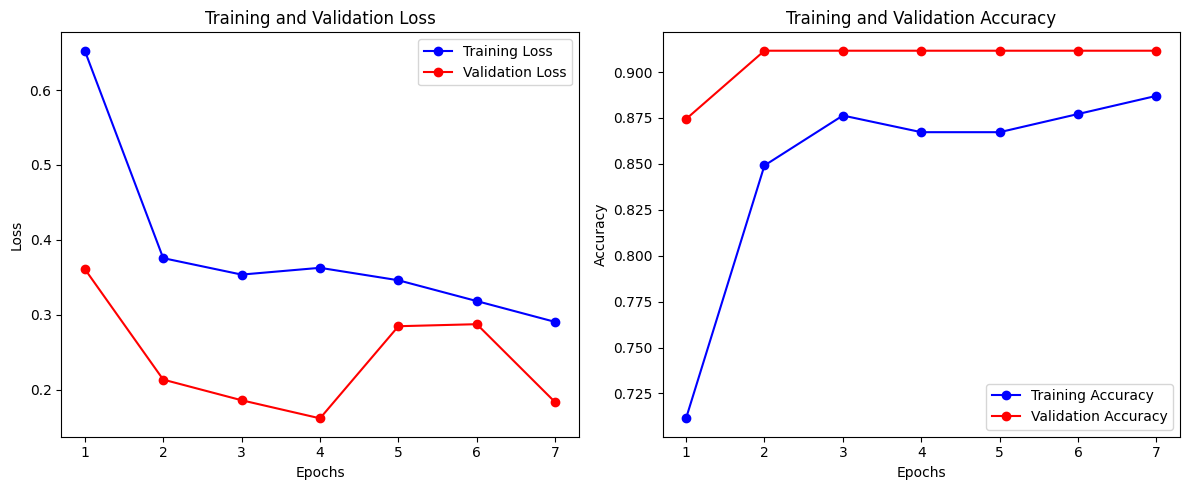

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_training_history(history):
    # Extracting loss and accuracy values
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(1, len(loss) + 1)

    # Plotting Loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)


##Confusion Matrix

In [ ]:
pip install seaborn scikit-learn matplotlib


7/7 [==============================] - 0s 10ms/step


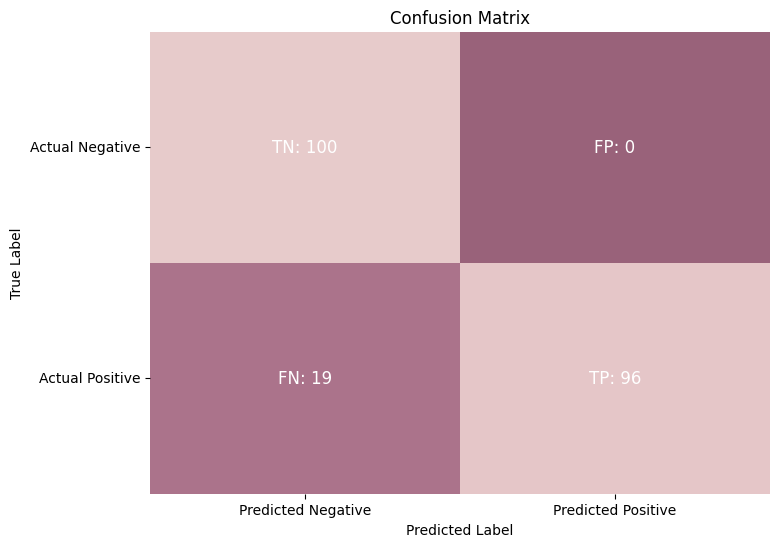

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

# Assuming you have y_pred and y_true as before
y_pred = model.predict(X_validation)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_validation, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Create a custom colormap using the specified colors
custom_colors = ['#99627A', '#C88EA7', '#E7CBCB']
custom_colormap = LinearSegmentedColormap.from_list('custom_pink_gradient', custom_colors)

# Define a function to annotate the confusion matrix
def annotate_confusion_matrix(ax, conf_matrix):
    # Annotate each cell with TP, FP, TN, FN labels
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            if i == 0 and j == 0:
                label = f'TN: {conf_matrix[i, j]}'
            elif i == 0 and j == 1:
                label = f'FP: {conf_matrix[i, j]}'
            elif i == 1 and j == 0:
                label = f'FN: {conf_matrix[i, j]}'
            elif i == 1 and j == 1:
                label = f'TP: {conf_matrix[i, j]}'
            ax.text(j + 0.5, i + 0.5, label, horizontalalignment='center', verticalalignment='center', color='white', fontsize=12)

# Plot using seaborn
def plot_confusion_matrix_seaborn(conf_matrix):
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(conf_matrix, annot=False, fmt='g', cmap=custom_colormap, cbar=False)
    annotate_confusion_matrix(ax, conf_matrix)

    # Set axis labels and title
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5, 1.5], labels=['Predicted Negative', 'Predicted Positive'], rotation=0)
    plt.yticks(ticks=[0.5, 1.5], labels=['Actual Negative', 'Actual Positive'], rotation=0)
    plt.show()

# Plot the confusion matrix using seaborn
plot_confusion_matrix_seaborn(conf_matrix)


##ROC Curve

8/8 [==============================] - 0s 12ms/step


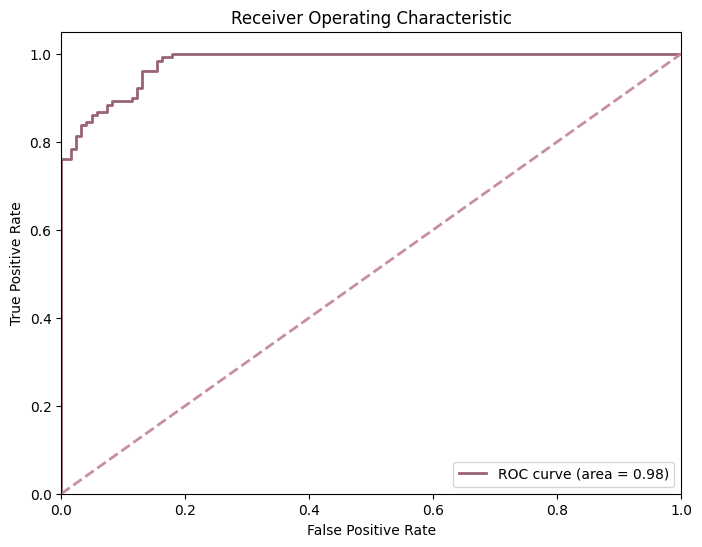

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_prob = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test.argmax(axis=1), y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))

# Plot ROC curve with the specified dark pink color
plt.plot(fpr, tpr, color='#99627A', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='#C88EA7', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()


##Prediction

In [ ]:
from IPython.display import Audio, display

# Path to the audio file
audio_path = '/content/drive/MyDrive/notationGen/gataberaya wav for testing.wav'

# Display the audio player
display(Audio(audio_path))


In [ ]:
import numpy as np
import librosa
from keras.models import load_model

# Function to extract MFCC features from an audio file
def extract_features(file_path, max_pad_len=100):
    # Load audio file
    audio, sample_rate = librosa.load(file_path, sr=None)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    # Padding to ensure uniform length
    pad_width = max_pad_len - mfccs.shape[1]
    if pad_width > 0:
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_len]

    return mfccs.T  # Transpose to have the shape (max_pad_len, n_mfcc)

# Load your trained model
model_path = '/content/drive/MyDrive/my_model.h5'
model = load_model(model_path)

# Path to the unseen audio file
unseen_audio_path = '/content/drive/MyDrive/Unseen/New-Recording-203.wav'

# Extract features from the unseen audio file
features = extract_features(unseen_audio_path)

# Reshape features to match input shape expected by the model
features_reshaped = features[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions

# Make a prediction
prediction = model.predict(features_reshaped)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

# Map numerical class to instrument names
class_names = ['flute', 'gataberaya']
predicted_label = class_names[predicted_class[0]]

# Path to the unseen audio file
unseen_audio_path = '/content/drive/MyDrive/Unseen/New-Recording-203.wav'
print(f"The predicted class for the unseen audio file is: {predicted_label}")

1/1 [==============================] - 0s 194ms/step
The predicted class for the unseen audio file is: flute


In [ ]:
# prompt: google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from IPython.display import Audio, display

# Path to the audio file
audio_path = '/content/drive/MyDrive/notationGen/unseen flute.wav'

# Display the audio player
display(Audio(audio_path))


In [ ]:
import numpy as np
import librosa
from keras.models import load_model

# Function to extract MFCC features from an audio file
def extract_features(file_path, max_pad_len=100):
    # Load audio file
    audio, sample_rate = librosa.load(file_path, sr=None)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    # Padding to ensure uniform length
    pad_width = max_pad_len - mfccs.shape[1]
    if pad_width > 0:
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_len]

    return mfccs.T  # Transpose to have the shape (max_pad_len, n_mfcc)

# Load your trained model
model_path = '/content/drive/MyDrive/my_model.h5'
model = load_model(model_path)

# Path to the unseen audio file
unseen_audio_path1 = '/content/drive/MyDrive/notationGen/New-Recording-203.wav'

# Extract features from the unseen audio file
features = extract_features(unseen_audio_path1)

# Reshape features to match input shape expected by the model
features_reshaped = features[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions

# Make a prediction
prediction = model.predict(features_reshaped)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

# Map numerical class to instrument names
class_names = ['flute', 'gataberaya']
predicted_label = class_names[predicted_class[0]]

print(f"The predicted class for the unseen audio file is: {predicted_label}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
The predicted class for the unseen audio file is: flute


In [ ]:
!pip install -q -U google-generativeai

In [ ]:
import google.generativeai as genai

GOOGLE_API_KEY = 'GOOGLE_API_KEY'
genai.configure(api_key=GOOGLE_API_KEY)


In [ ]:
import os
import google.generativeai as genai

GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)


In [ ]:
import os
os.environ['GOOGLE_API_KEY'] = 'GOOGLE_API_KEY'


In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
!pip install sounddevice scipy numpy matplotlib


In [ ]:
notes = [
    ['C0', 16.35],
    ['C#0/Db0', 17.32],
    ['D0', 18.35],
    ['D#0/Eb0', 19.45],
    ['E0', 20.60],
    ['F0', 21.83],
    ['F#0/Gb0', 23.12],
    ['G0', 24.50],
    ['G#0/Ab0', 25.96],
    ['A0', 27.50],
    ['A#0/Bb0', 29.14],
    ['B0', 30.87],
    ['C1', 32.70],
    ['C#1/Db1', 34.65],
    ['D1', 36.71],
    ['D#1/Eb1', 38.89],
    ['E1', 41.20],
    ['F1', 43.65],
    ['F#1/Gb1', 46.25],
    ['G1', 49.00],
    ['G#1/Ab1', 51.91],
    ['A1', 55.00],
    ['A#1/Bb1', 58.27],
    ['B1', 61.74],
    ['C2', 65.41],
    ['C#2/Db2', 69.30],
    ['D2', 73.42],
    ['D#2/Eb2', 77.78],
    ['E2', 82.41],
    ['F2', 87.31],
    ['F#2/Gb2', 92.50],
    ['G2', 98.00],
    ['G#2/Ab2', 103.83],
    ['A2', 110.00],
    ['A#2/Bb2', 116.54],
    ['B2', 123.47],
    ['C3', 130.81],
    ['C#3/Db3', 138.59],
    ['D3', 146.83],
    ['D#3/Eb3', 155.56],
    ['E3', 164.81],
    ['F3', 174.61],
    ['F#3/Gb3', 185.00],
    ['G3', 196.00],
    ['G#3/Ab3', 207.65],
    ['A3', 220.00],
    ['A#3/Bb3', 233.08],
    ['B3', 246.94],
    ['C4', 261.63],
    ['C#4/Db4', 277.18],
    ['D4', 293.66],
    ['D#4/Eb4', 311.13],
    ['E4', 329.63],
    ['F4', 349.23],
    ['F#4/Gb4', 369.99],
    ['G4', 392.00],
    ['G#4/Ab4', 415.30],
    ['A4', 440.00],
    ['A#4/Bb4', 466.16],
    ['B4', 493.88],
    ['C5', 523.25],
    ['C#5/Db5', 554.37],
    ['D5', 587.33],
    ['D#5/Eb5', 622.25],
    ['E5', 659.25],
    ['F5', 698.46],
    ['F#5/Gb5', 739.99],
    ['G5', 783.99],
    ['G#5/Ab5', 830.61],
    ['A5', 880.00],
    ['A#5/Bb5', 932.33],
    ['B5', 987.77],
    ['C6', 1046.50],
    ['C#6/Db6', 1108.73],
    ['D6', 1174.66],
    ['D#6/Eb6', 1244.51	],
    ['E6', 1318.51],
    ['F6', 1396.91],
    ['F#6/Gb6', 1479.98],
    ['G6', 1567.98],
    ['G#6/Ab6', 1661.22],
    ['A6', 1760.00	],
    ['A#6/Bb6', 1864.66],
    ['B6', 1975.53	],
    ['C7', 2093.00],
    ['C#7/Db7', 2217.46],
    ['D7', 2349.32],
    ['D#7/Eb7', 2489.02],
    ['E7', 2637.02],
    ['F7', 2793.83],
    ['F#7/Gb7 ', 2959.96],
    ['G7', 3135.96],
    ['G#7/Ab7', 3322.44],
    ['A7', 3520.00],
    ['A#7/Bb7', 3729.31],
    ['B7', 3951.07],
    ['C8', 4186.01],
    ['C#8/Db8', 4434.92],
    ['D8', 4698.63],
    ['D#8/Eb8', 4978.03],
    ['E8', 5274.04],
    ['F8', 5587.65],
    ['F#8/Gb8', 5919.91],
    ['G8', 6271.93],
    ['G#8/Ab8', 6644.88	],
    ['A8', 7040.00],
    ['A#8/Bb8', 7458.62],
    ['B8', 7902.13],
]

In [ ]:
from IPython.display import Audio, display

# Path to the audio file
audio_path = '/content/drive/MyDrive/notationGen/New-Recording-203.wav'

# Display the audio player
display(Audio(audio_path))


In [ ]:
import numpy as np
import librosa
from keras.models import load_model
import os
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import scipy.fftpack
import google.generativeai as genai


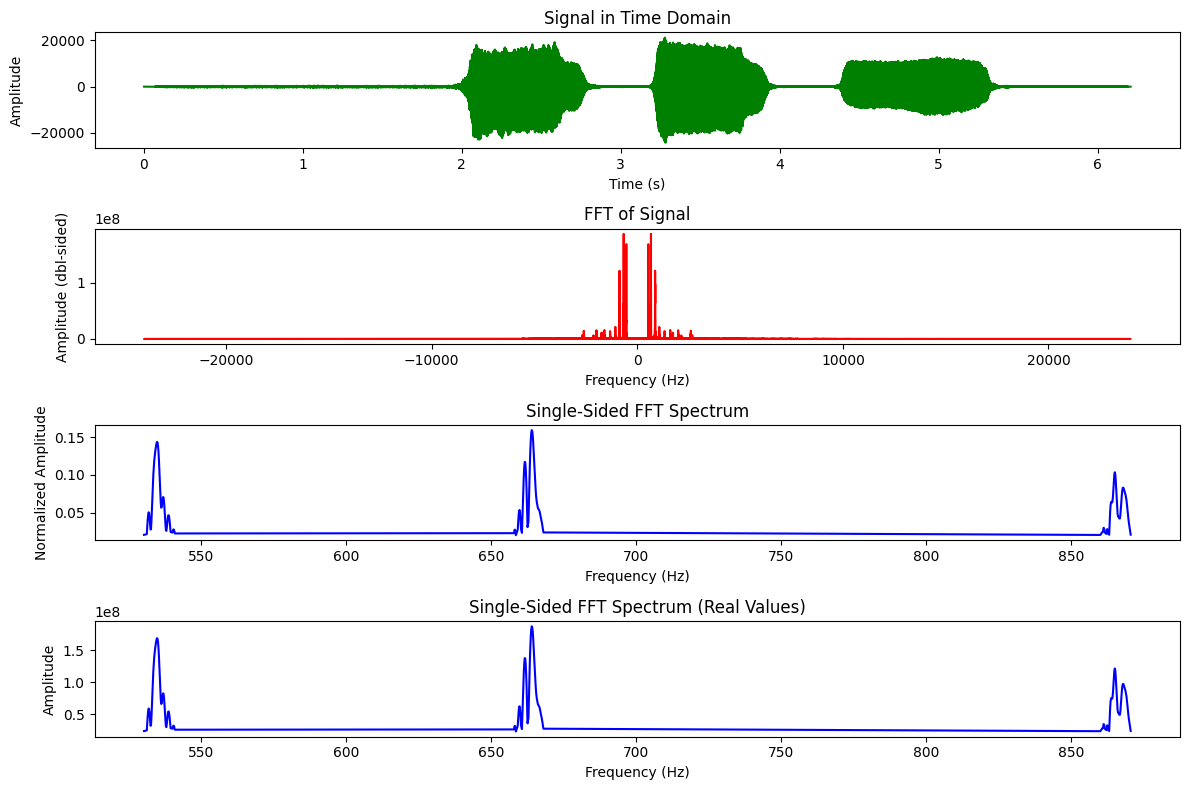

Detected notes: ['C5', 'E5', 'A5']
ස5, ග5, ධ5


In [ ]:
# Only execute the following code if the predicted label is 'flute'
if predicted_label == 'flute':
    # Set up API key and configure the model
    GOOGLE_API_KEY = 'GOOGLE_API_KEY'
    genai.configure(api_key=GOOGLE_API_KEY)
    model = genai.GenerativeModel('gemini-pro')

    # Find the note and octave corresponding to a frequency
    def get_note(frequency, notes):
        for note, freq in notes:
            if freq * 0.986 <= frequency <= freq * 1.015:
                return note
        return ''

    # Plotting function
    def show_plot(time_vector, signal, fft_frequencies, x, y, y_real_values, fft):
        plt.figure(figsize=(12, 8))

        plt.subplot(4, 1, 1)
        plt.plot(time_vector, signal, "g")
        plt.title('Signal in Time Domain')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')

        plt.subplot(4, 1, 2)
        plt.plot(fft_frequencies, fft, "r")
        plt.title('FFT of Signal')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude (dbl-sided)')

        plt.subplot(4, 1, 3)
        plt.plot(x, y, "b")
        plt.title('Single-Sided FFT Spectrum')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Normalized Amplitude')

        plt.subplot(4, 1, 4)
        plt.plot(x, y_real_values, "b")
        plt.title('Single-Sided FFT Spectrum (Real Values)')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')

        plt.tight_layout()
        plt.show()

    # Frequency detection function
    def detect_notes(threshold=0.01, min_freq=100, max_freq=10000, amplitude_threshold=0.02):
        # Read the audio file
        sample_rate, signal = wavfile.read(unseen_audio_path1)

        # Convert stereo to mono if necessary
        if len(signal.shape) == 2:
            signal = signal.sum(axis=1) / 2

        N = signal.shape[0]
        time_samples_per_sec = 1.0 / sample_rate
        time_vector = np.arange(0, N / sample_rate, time_samples_per_sec)

        # FFT computation
        fft = np.abs(scipy.fft.fft(signal))
        fft_frequencies = scipy.fftpack.fftfreq(N, time_samples_per_sec)
        fft_one_side = fft[:N // 2]
        fft_frequencies_one_side = fft_frequencies[:N // 2]

        normalized_amplitude = fft_one_side / np.linalg.norm(fft_one_side)
        real_amplitude = np.abs(fft_one_side)

        x, y, y_real_values, recorded_notes = [], [], [], []

        # Note detection
        for i, freq in enumerate(fft_frequencies_one_side):
            if min_freq <= freq <= max_freq:
                amplitude = normalized_amplitude[i]
                if amplitude > amplitude_threshold:
                    x.append(freq)
                    y.append(amplitude)
                    y_real_values.append(real_amplitude[i])
                    note = get_note(freq, notes)
                    if note:
                        if note not in recorded_notes:
                            recorded_notes.append(note)

        show_plot(time_vector, signal, fft_frequencies, x, y, y_real_values, fft)
        return recorded_notes



    # Call the detect_notes function with adjusted parameters
    detected_notes = detect_notes(threshold=0.01, min_freq=110, max_freq=8200, amplitude_threshold=0.02)
    print("Detected notes:", detected_notes)

    # Prepare the prompt for the generative AI model
    prompt = f"""You are a music teacher with knowledge in both oriental music in Sinhala and western notations.
    Below is how the notes are written in Sinhala:

    C4: ස4
    C#4: කෝමල රි4
    D4: රි4
    D#4: කෝමල ග4
    E4: ග4
    F4: ම4
    F#4: තිව්ර ම4
    G4: ප4
    G#4: කෝමල ධ4
    A4: ධ4
    A#4: කෝමල නි4
    B4: නි4
    C5: ස5

    For the following musical notes, generate the Sinhala musical notations:

    {', '.join(detected_notes)}
    """

    # Generate the response from the model
    response = model.generate_content(prompt)

    # Print the response
    print(response.text)


In [ ]:
import os

# Paths
Thath = '/content/drive/MyDrive/GataberayaClassification/gataberaya1/Thath'
Jith = '/content/drive/MyDrive/GataberayaClassification/gataberaya1/Jith'
Dom = '/content/drive/MyDrive/GataberayaClassification/gataberaya1/Dom'
Nang = '/content/drive/MyDrive/GataberayaClassification/gataberaya1/Nang'

# Function to count audio files
def count_audio_files(path):
    return len([f for f in os.listdir(path) if f.endswith('.wav')])

# Count files in each path
Thath_count = count_audio_files(Thath)
Jith_count = count_audio_files(Jith)
Dom_count = count_audio_files(Dom)
Nang_count = count_audio_files(Nang)

print(f"Number of audio files in Thath path: {Thath_count}")
print(f"Number of audio files in Jith path: {Jith_count}")
print(f"Number of audio files in Dom path: {Dom_count}")
print(f"Number of audio files in Nang path: {Nang_count}")


Number of audio files in Thath path: 71
Number of audio files in Jith path: 71
Number of audio files in Dom path: 71
Number of audio files in Nang path: 71


In [ ]:
import os
import random


# Function to count audio files
def count_audio_files(path):
    # Simulating file count instead of actual directory access
    files = [f for f in os.listdir(path) if f.endswith('.wav')]
    return len(files), files

# Function to simulate file duplication and store in variable
def simulate_duplicate_files(files, target_count):
    current_count = len(files)
    if current_count >= target_count:
        return files  # No duplication needed, return the original list

    # Calculate how many duplicates are needed
    num_duplicates = target_count - current_count
    print(f"Simulating duplication of {num_duplicates} files")

    duplicated_files = files.copy()  # Start with the original list of files
    # Simulate duplicating files
    while num_duplicates > 0:
        file_to_duplicate = random.choice(files)
        new_file_name = f"copy_{num_duplicates}_{file_to_duplicate}"
        duplicated_files.append(new_file_name)
        num_duplicates -= 1

    return duplicated_files

# Get the file counts and lists of files in each path
Thath_count, Thath_files = count_audio_files(Thath)
Jith_count, Jith_files = count_audio_files(Jith)
Dom_count, Dom_files = count_audio_files(Dom)
Nang_count, Nang_files = count_audio_files(Nang)

# Find the maximum number of files in any class
max_files = max(Thath_count, Jith_count, Dom_count, Nang_count)

# Simulate duplicating files to match the maximum number of files
Thath_simulated_files = simulate_duplicate_files(Thath_files, max_files)
Jith_simulated_files = simulate_duplicate_files(Jith_files, max_files)
Dom_simulated_files = simulate_duplicate_files(Dom_files, max_files)
Nang_simulated_files = simulate_duplicate_files(Nang_files, max_files)

# Print the results
print(f"Simulated number of files in Thath path: {len(Thath_simulated_files)}")
print(f"Simulated number of files in Jith path: {len(Jith_simulated_files)}")
print(f"Simulated number of files in Dom path: {len(Dom_simulated_files)}")
print(f"Simulated number of files in Nang path: {len(Nang_simulated_files)}")

# You now have the duplicated files stored in variables without writing to disk.

Simulated number of files in Thath path: 71
Simulated number of files in Jith path: 71
Simulated number of files in Dom path: 71
Simulated number of files in Nang path: 71


In [ ]:
import os
import shutil  # For copying files

# Mount Google Drive if needed (for Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Base directory where the original files are stored
base_dir = '/content/drive/MyDrive/GataberayaClassification/gataberaya1'

# Directory where the simulated files will be saved
save_dir = '/content/drive/MyDrive/GataberayaClassification/gataberaya_augmented'

# Ensure the destination directory exists
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Function to save duplicated files
def save_simulated_files(simulated_files, original_path, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    for file_name in simulated_files:
        original_file_path = os.path.join(original_path, file_name.replace('copy_', '').split('_')[-1])
        simulated_file_path = os.path.join(save_path, file_name)

        if os.path.exists(original_file_path):
            # Copy the original file to the new path with the new name
            shutil.copy(original_file_path, simulated_file_path)
        else:
            print(f"Original file not found: {original_file_path}")

# Define paths for the new folders where augmented files will be saved
Thath_save_path = os.path.join(save_dir, 'Thath')
Jith_save_path = os.path.join(save_dir, 'Jith')
Dom_save_path = os.path.join(save_dir, 'Dom')
Nang_save_path = os.path.join(save_dir, 'Nang')

# Save the files for each category
save_simulated_files(Thath_simulated_files, os.path.join(base_dir, 'Thath'), Thath_save_path)
save_simulated_files(Jith_simulated_files, os.path.join(base_dir, 'Jith'), Jith_save_path)
save_simulated_files(Dom_simulated_files, os.path.join(base_dir, 'Dom'), Dom_save_path)
save_simulated_files(Nang_simulated_files, os.path.join(base_dir, 'Nang'), Nang_save_path)

print("Simulated files saved successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Simulated files saved successfully.


In [ ]:
import os
import numpy as np
import librosa

# Audio augmentation functions
def add_noise(audio, noise_level=0.005):
    """Add random noise to the audio."""
    noise = np.random.randn(len(audio))
    return audio + noise_level * noise

def shift_audio(audio, shift_max=0.5):
    """Shift the audio by a random fraction."""
    shift = np.random.uniform(-shift_max, shift_max) * len(audio)
    return np.roll(audio, int(shift))

def change_pitch(audio, sr, n_steps=2):
    """Change the pitch of the audio."""
    return librosa.effects.pitch_shift(audio, sr=sr, n_steps=n_steps)

def change_speed(audio, speed_factor=1.2):
    """Change the speed of the audio."""
    return librosa.effects.time_stretch(audio, rate=speed_factor)

# Function to apply a specific augmentation to audio files
def apply_augmentation(original_files, augmentation_fn, *args):
    """Apply an augmentation function to each audio file."""
    augmented_files = []

    for file_name in original_files:
        try:
            audio, sr = librosa.load(file_name, sr=None)  # Load the audio file
            if augmentation_fn == change_speed:
                augmented_audio = augmentation_fn(audio, *args)  # No need for sample rate in speed change
            else:
                augmented_audio = augmentation_fn(audio, sr, *args)
            augmented_files.append((augmented_audio, sr))
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

    return augmented_files

# Define all augmentation techniques
augmentations = [
    {"name": "noisy", "function": add_noise},
    {"name": "shifted", "function": shift_audio},
    {"name": "pitched", "function": change_pitch, "params": [2]},  # Change pitch by 2 steps
    {"name": "speed_changed", "function": change_speed, "params": [1.2]},  # Change speed by 1.2x
]

# Original file sets for each category
categories = {
    "Thath": Thath_simulated_files,
    "Jith": Jith_simulated_files,
    "Dom": Dom_simulated_files,
    "Nang": Nang_simulated_files,
}

# Dictionary to store augmented files for each category
augmented_files = {key: [] for key in categories}

# Apply augmentations to each category
for category_name, original_files in categories.items():
    print(f"Applying augmentations to {category_name}...")

    # Apply each augmentation technique
    for aug in augmentations:
        aug_name = aug["name"]
        aug_function = aug["function"]
        aug_params = aug.get("params", [])

        augmented = apply_augmentation(original_files, aug_function, *aug_params)

        # Store the augmented files
        augmented_files[category_name].extend(augmented)
        print(f"{aug_name.capitalize()} augmentation applied to {category_name}.")

    # Combine original and augmented files
    augmented_files[category_name].extend(original_files)

# Print the number of files after combining originals and augmented versions
for category_name, files in augmented_files.items():
    print(f"Number of combined {category_name} files: {len(files)}")


Applying augmentations to Thath...


<ipython-input-7-097dc2fab23d>:31: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_name, sr=None)  # Load the audio file
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing thath-48.wav: [Errno 2] No such file or directory: 'thath-48.wav'
Error processing thath-49.wav: [Errno 2] No such file or directory: 'thath-49.wav'
Error processing thath-50.wav: [Errno 2] No such file or directory: 'thath-50.wav'
Error processing thath-51.wav: [Errno 2] No such file or directory: 'thath-51.wav'
Error processing thath-52.wav: [Errno 2] No such file or directory: 'thath-52.wav'
Error processing thath-53.wav: [Errno 2] No such file or directory: 'thath-53.wav'
Error processing thath-54.wav: [Errno 2] No such file or directory: 'thath-54.wav'
Error processing thath-55.wav: [Errno 2] No such file or directory: 'thath-55.wav'
Error processing thath-56.wav: [Errno 2] No such file or directory: 'thath-56.wav'
Error processing thath-57.wav: [Errno 2] No such file or directory: 'thath-57.wav'
Error processing thath-58.wav: [Errno 2] No such file or directory: 'thath-58.wav'
Error processing thath-59.wav: [Errno 2] No such file or directory: 'thath-59.wav'
Erro

In [ ]:
import os
import numpy as np
import librosa


# Function to add noise
def add_noise(audio, noise_level=0.005):
    noise = np.random.randn(len(audio))
    audio_noisy = audio + noise_level * noise
    return audio_noisy

# Function to apply shifting
def shift_audio(audio, shift_max=0.5):
    shift = np.random.uniform(-shift_max, shift_max) * len(audio)
    return np.roll(audio, int(shift))

# Function to change pitch
def change_pitch(audio, sr, n_steps=2):
    return librosa.effects.pitch_shift(audio, sr=sr, n_steps=n_steps)

# Function to change speed
def change_speed(audio, speed_factor=1.2):
    return librosa.effects.time_stretch(audio, rate=speed_factor)

# Function to load original audio files
def load_original_audio_files(path):
    original_files = []
    for filename in os.listdir(path):
        if filename.endswith('.wav'):
            file_path = os.path.join(path, filename)
            audio, sr = librosa.load(file_path, sr=None)
            original_files.append((audio, sr))
    return original_files

# Function to apply a specific augmentation to audio files
def apply_augmentation(original_files, augmentation_fn, *args):
    augmented_files = []
    for audio, sr in original_files:
        if augmentation_fn == change_speed:
            augmented_audio = augmentation_fn(audio, *args)  # No sample rate needed for speed change
        else:
            augmented_audio = augmentation_fn(audio, sr, *args)
        augmented_files.append((augmented_audio, sr))
    return augmented_files

# Load original audio files
original_Thath_files = load_original_audio_files(Thath)
original_Jith_files = load_original_audio_files(Jith)
original_Dom_files = load_original_audio_files(Dom)
original_Nang_files = load_original_audio_files(Nang)

# Apply each augmentation
Thath_noisy = apply_augmentation(original_Thath_files, add_noise)
Jith_noisy = apply_augmentation(original_Jith_files, add_noise)
Dom_noisy = apply_augmentation(original_Dom_files, add_noise)
Nang_noisy = apply_augmentation(original_Nang_files, add_noise)

Thath_shifted = apply_augmentation(original_Thath_files, shift_audio)
Jith_shifted = apply_augmentation(original_Jith_files, shift_audio)
Dom_shifted = apply_augmentation(original_Dom_files, shift_audio)
Nang_shifted = apply_augmentation(original_Nang_files, shift_audio)

Thath_pitched = apply_augmentation(original_Thath_files, change_pitch, 2)  # You can vary the n_steps
Jith_pitched = apply_augmentation(original_Jith_files, change_pitch, 2)
Dom_pitched = apply_augmentation(original_Dom_files, change_pitch, 2)
Nang_pitched = apply_augmentation(original_Nang_files, change_pitch, 2)

Thath_speed_changed = apply_augmentation(original_Thath_files, change_speed, 1.2)  # No sample rate for speed
Jith_speed_changed = apply_augmentation(original_Jith_files, change_speed, 1.2)
Dom_speed_changed = apply_augmentation(original_Dom_files, change_speed, 1.2)
Nang_speed_changed = apply_augmentation(original_Nang_files, change_speed, 1.2)

# Combine original and augmented files
aug_Thath = (original_Thath_files + Thath_noisy + Thath_shifted + Thath_pitched + Thath_speed_changed)
aug_Jith = (original_Jith_files + Jith_noisy + Jith_shifted + Jith_pitched + Jith_speed_changed)
aug_Dom = (original_Dom_files + Dom_noisy + Dom_shifted + Dom_pitched + Dom_speed_changed)
aug_Nang = (original_Nang_files + Nang_noisy + Nang_shifted + Nang_pitched + Nang_speed_changed)

# Count files after combining
aug_Thath_count = len(aug_Thath)
aug_Jith_count = len(aug_Jith)
aug_Dom_count = len(aug_Dom)
aug_Nang_count = len(aug_Nang)

print(f"Number of combined Thath files: {aug_Thath_count}")
print(f"Number of combined Jith files: {aug_Jith_count}")
print(f"Number of combined Dom files: {aug_Dom_count}")
print(f"Number of combined Nang files: {aug_Nang_count}")


Number of combined Thath files: 355
Number of combined Jith files: 355
Number of combined Dom files: 355
Number of combined Nang files: 355


## Thath Spectrograms
Thath File 25:


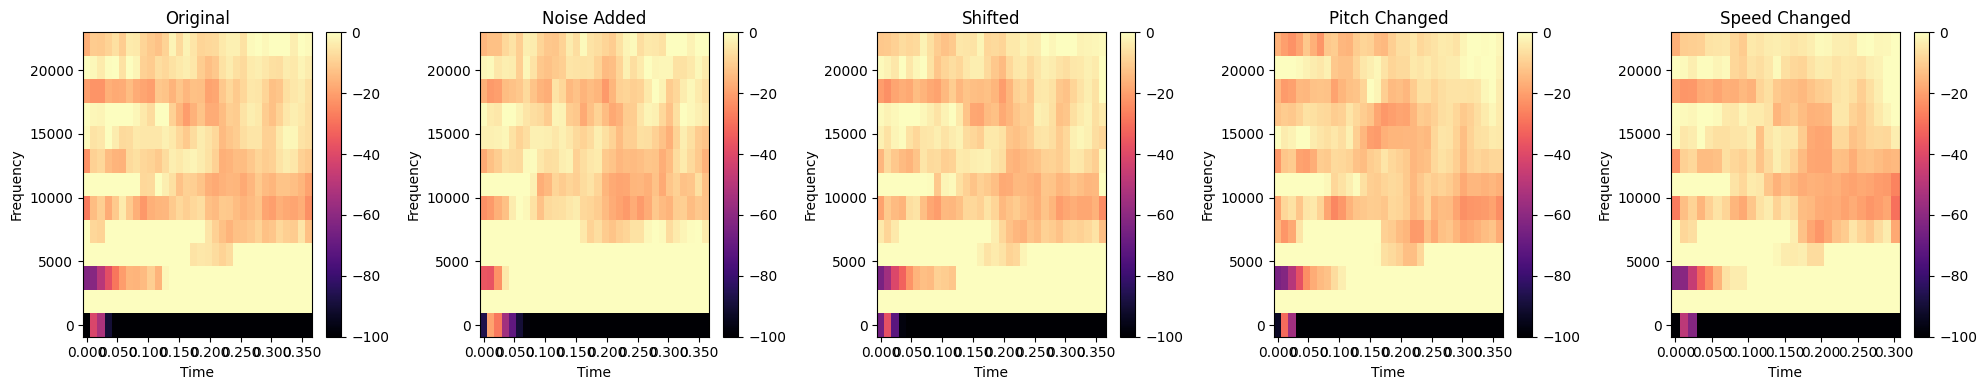

Thath File 279:


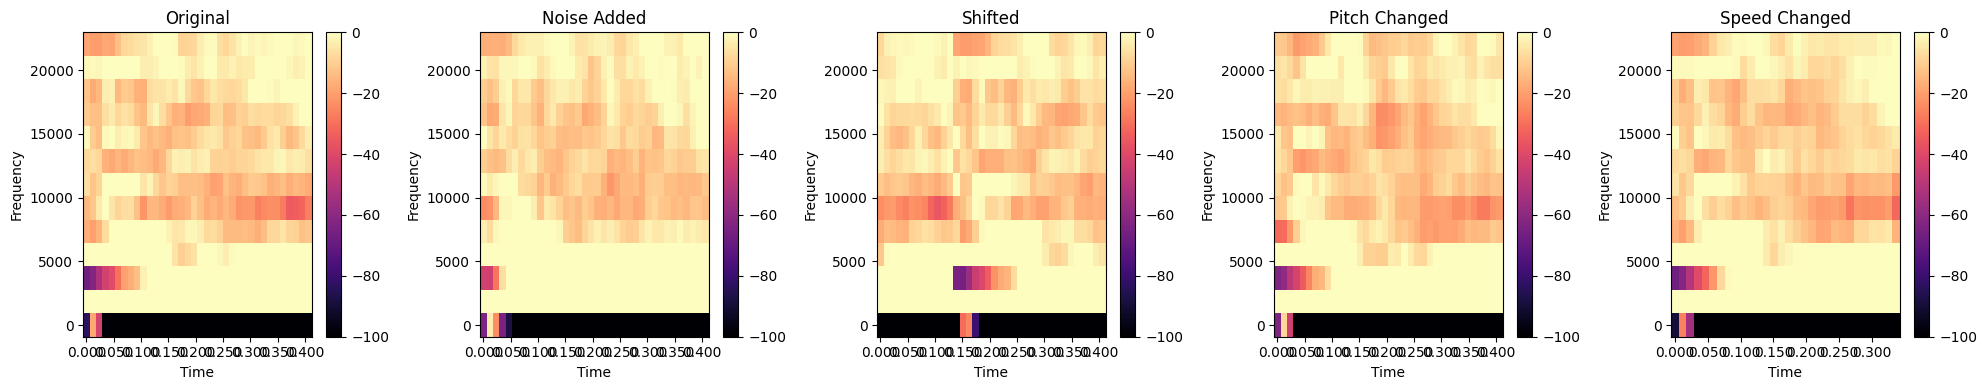

Thath File 93:


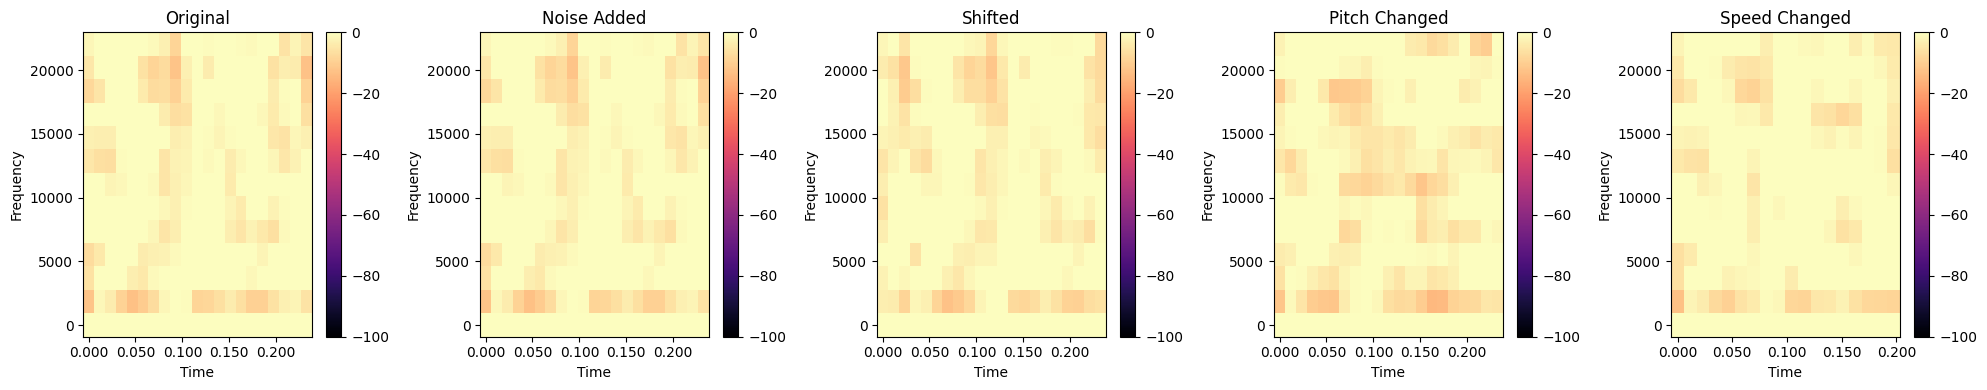


## Jith Spectrograms
Jith File 164:


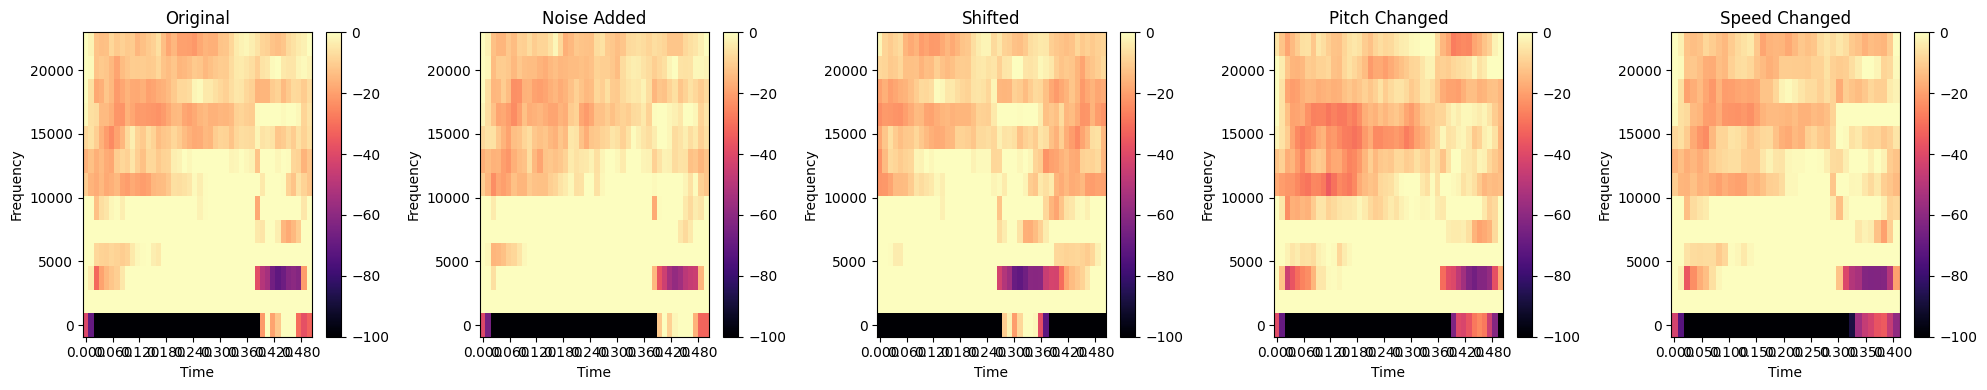

Jith File 203:


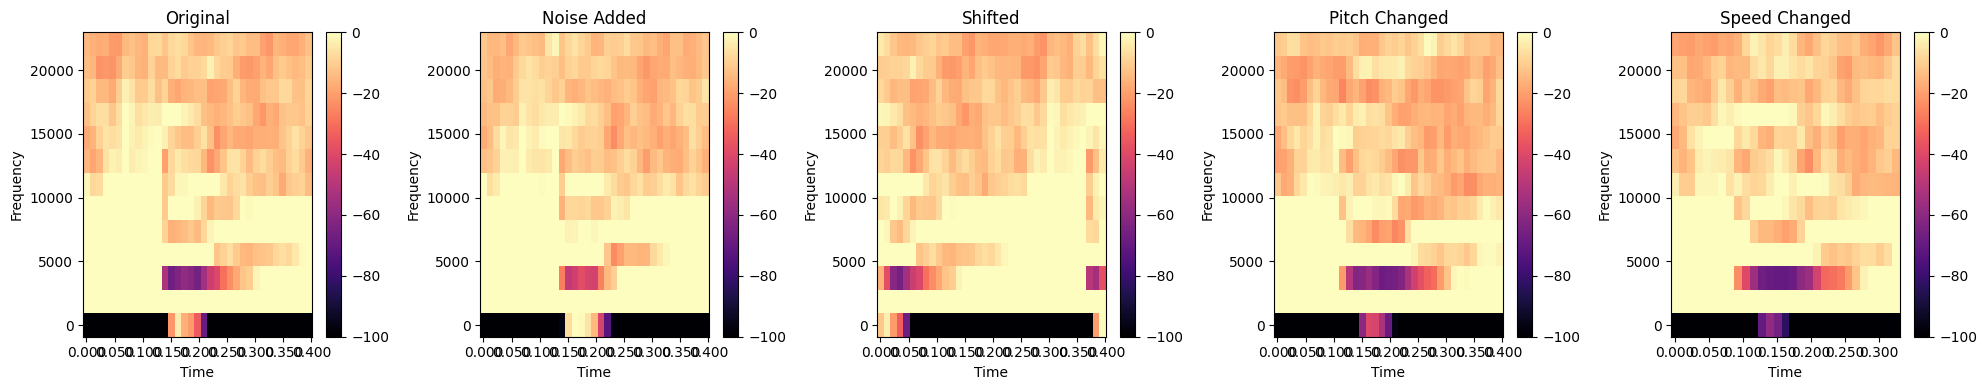

Jith File 101:


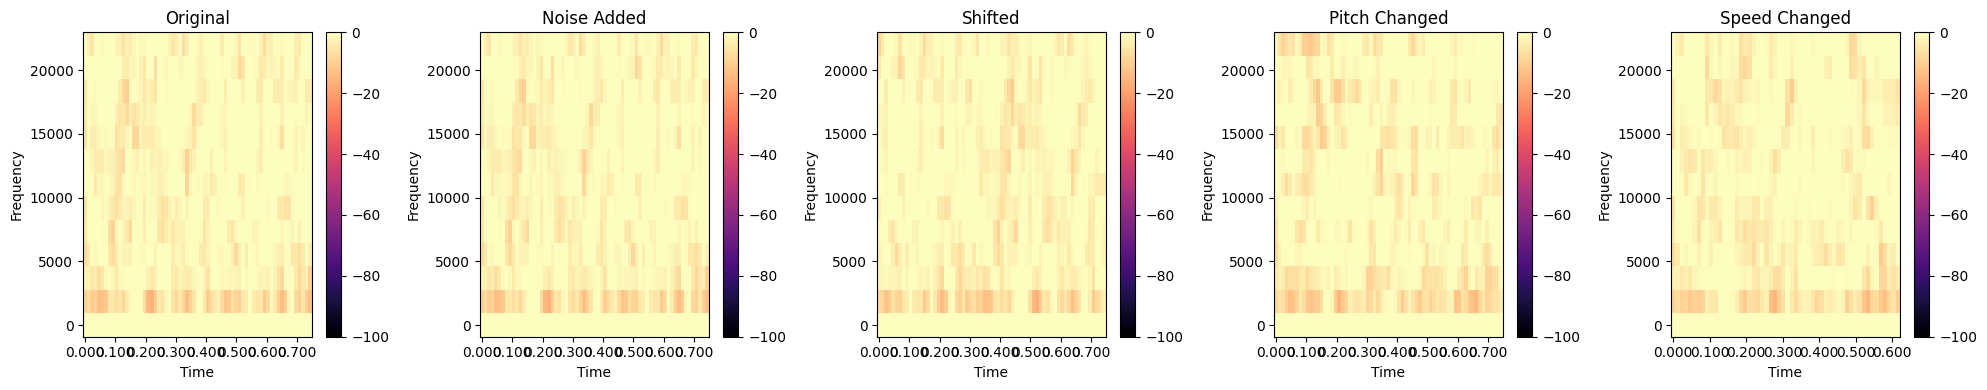


## Dom Spectrograms
Dom File 176:


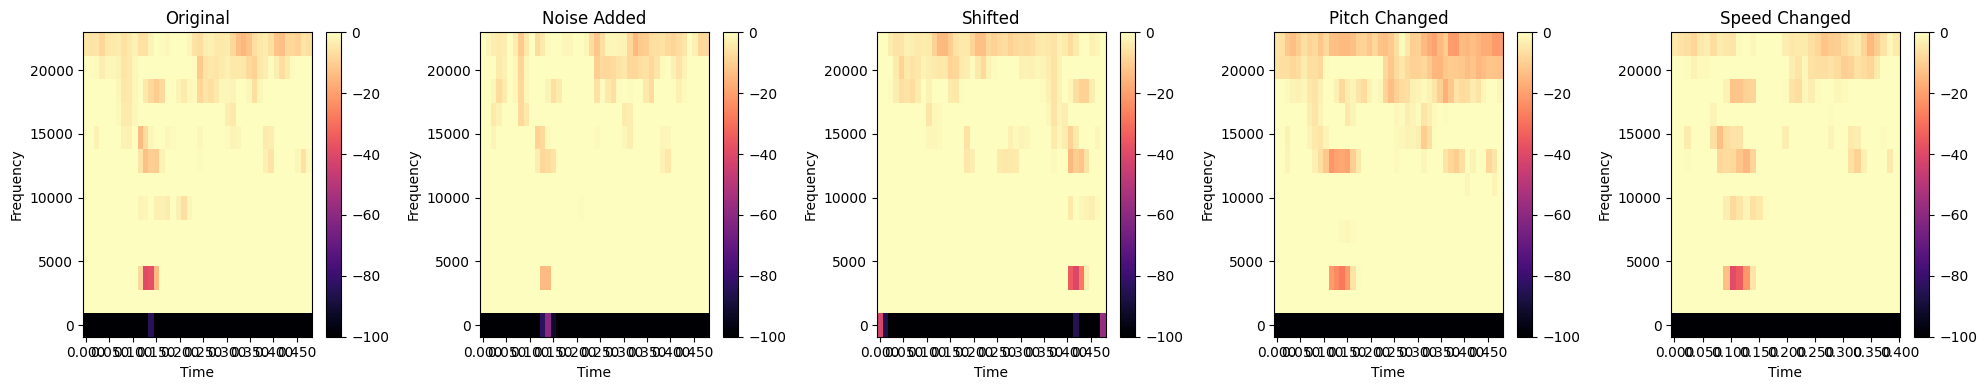

Dom File 26:


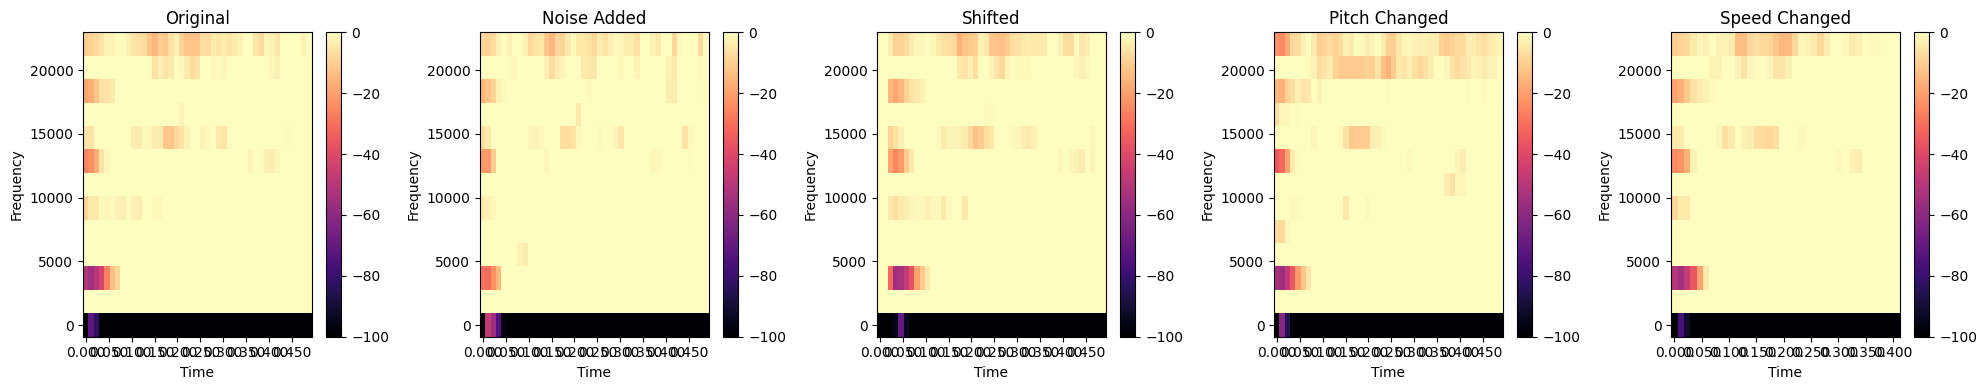

Dom File 292:


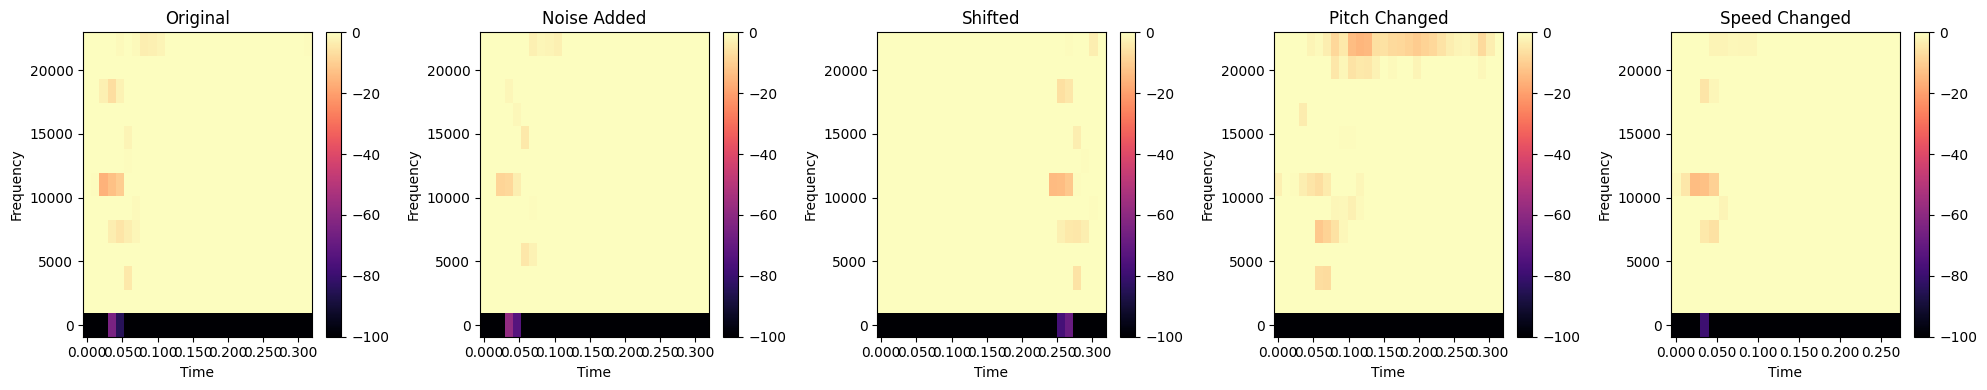


## Nang Spectrograms
Nang File 10:


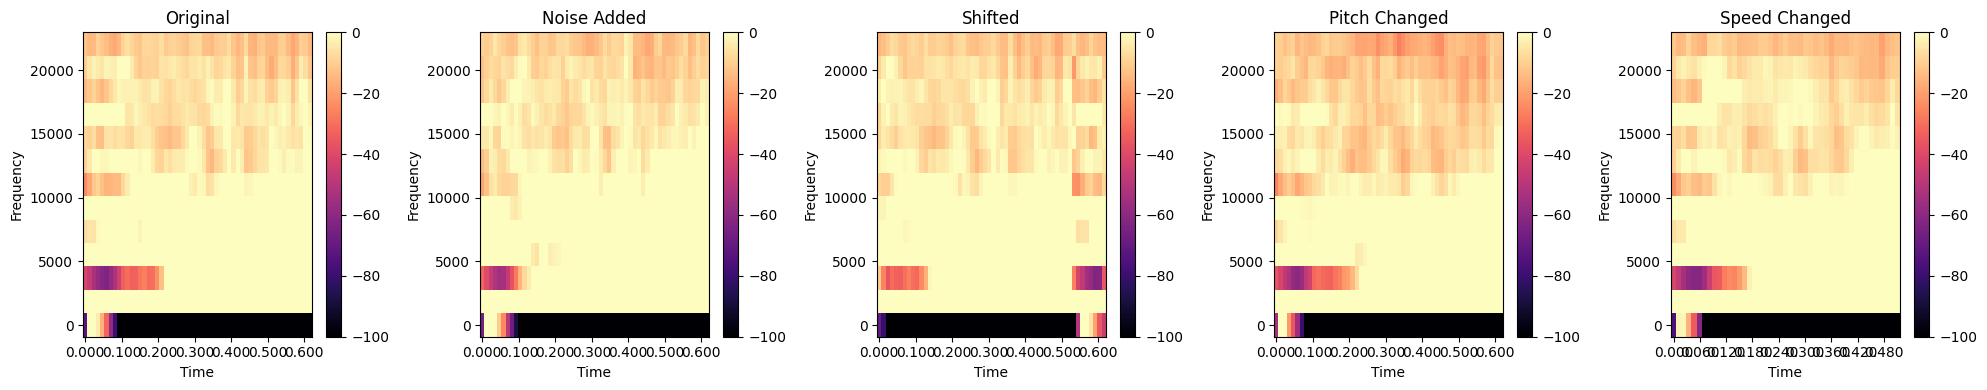

Nang File 320:


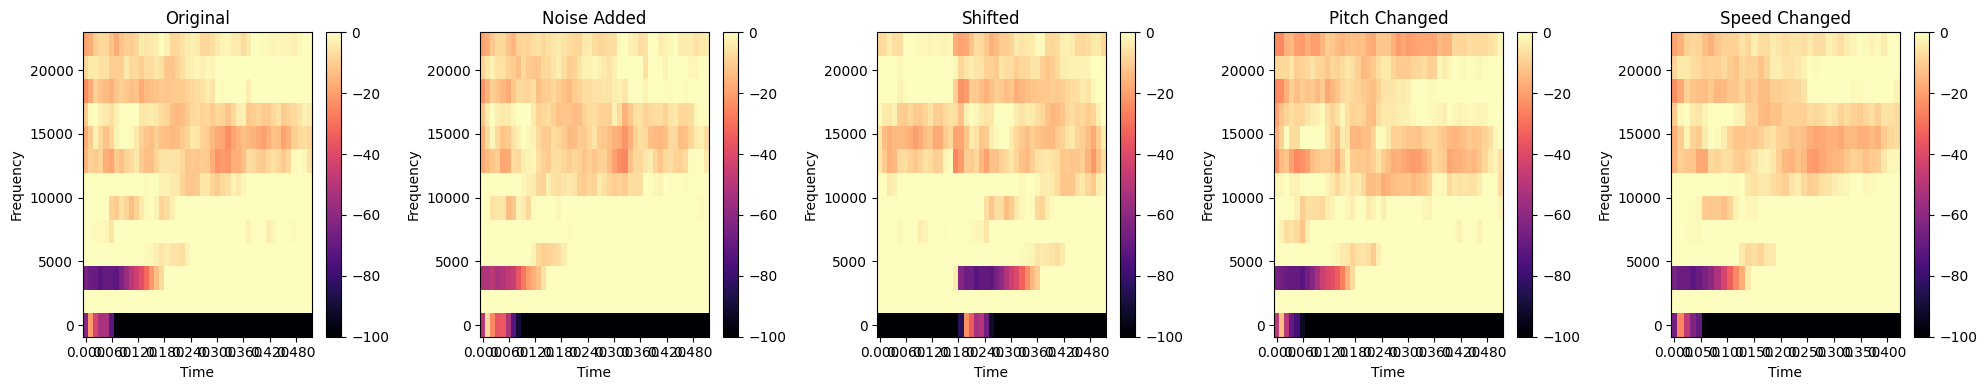

Nang File 317:


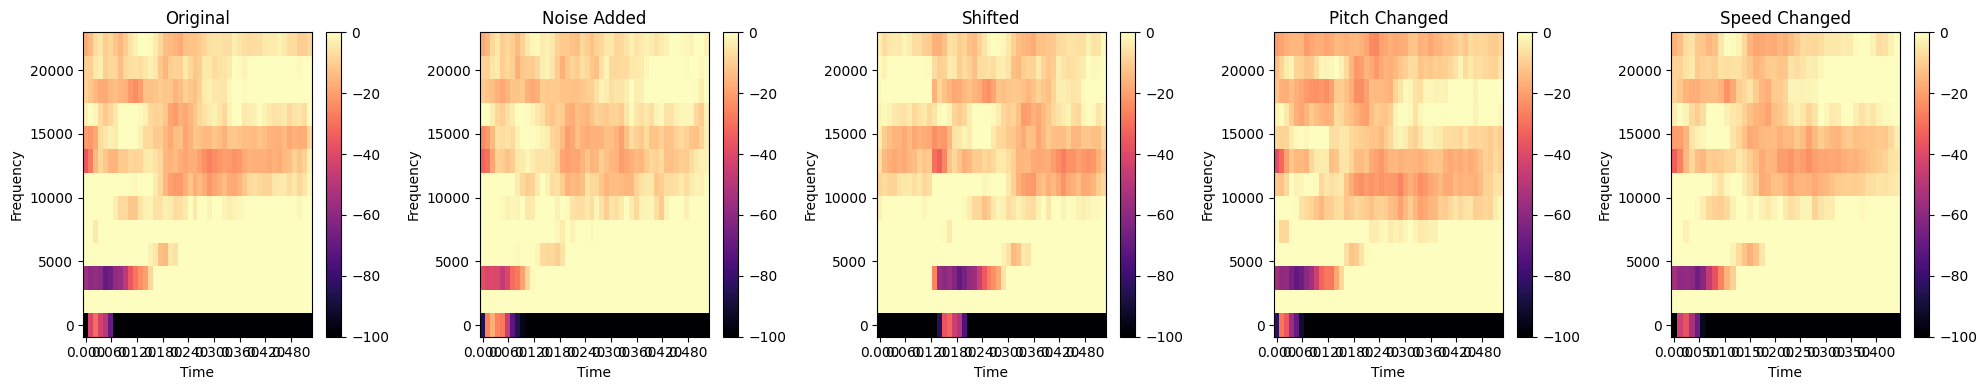

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import random

# Function to plot spectrogram
def plot_spectrogram(audio, sr, plot_type='mfcc'):
    if plot_type == 'mfcc':
        features = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    elif plot_type == 'mel':
        features = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
    else:
        raise ValueError("Invalid plot_type. Choose 'mfcc' or 'mel'.")
    return features

# Function to plot and display spectrograms
def display_spectrograms(audio_files, title_prefix):
    random_indices = random.sample(range(len(audio_files)), 3)
    for i in random_indices:
        audio, sr = audio_files[i]
        print(f"{title_prefix} File {i+1}:")

        # Create subplots for side-by-side comparison
        fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

        # Plot original
        librosa.display.specshow(plot_spectrogram(audio, sr, 'mfcc'),
                                 sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                                 vmin=-100, vmax=0, ax=axes[0])
        axes[0].set_title("Original")
        fig.colorbar(axes[0].get_children()[0], ax=axes[0])

        # Plot noisy
        librosa.display.specshow(plot_spectrogram(add_noise(audio), sr, 'mfcc'),
                                 sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                                 vmin=-100, vmax=0, ax=axes[1])
        axes[1].set_title("Noise Added")
        fig.colorbar(axes[1].get_children()[0], ax=axes[1])

        # Plot shifted
        librosa.display.specshow(plot_spectrogram(shift_audio(audio), sr, 'mfcc'),
                                 sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                                 vmin=-100, vmax=0, ax=axes[2])
        axes[2].set_title("Shifted")
        fig.colorbar(axes[2].get_children()[0], ax=axes[2])

        # Plot pitched
        librosa.display.specshow(plot_spectrogram(change_pitch(audio, sr), sr, 'mfcc'),
                                 sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                                 vmin=-100, vmax=0, ax=axes[3])
        axes[3].set_title("Pitch Changed")
        fig.colorbar(axes[3].get_children()[0], ax=axes[3])

        # Plot speed changed
        librosa.display.specshow(plot_spectrogram(change_speed(audio), sr, 'mfcc'),
                                 sr=sr, x_axis='time', y_axis='linear', cmap='magma',
                                 vmin=-100, vmax=0, ax=axes[4])
        axes[4].set_title("Speed Changed")
        fig.colorbar(axes[4].get_children()[0], ax=axes[4])

        for ax in axes:
            ax.set_xlabel("Time")
            ax.set_ylabel("Frequency")

        plt.tight_layout()
        plt.show()

# Display spectrograms for each class
print("## Thath Spectrograms")
display_spectrograms(aug_Thath, "Thath")

print("\n## Jith Spectrograms")
display_spectrograms(aug_Jith, "Jith")

print("\n## Dom Spectrograms")
display_spectrograms(aug_Dom, "Dom")

print("\n## Nang Spectrograms")
display_spectrograms(aug_Nang, "Nang")


In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Constants
NUM_MFCC = 40
FIXED_LENGTH = 100

# Function to extract fixed-length MFCC features
def extract_mfcc_uniform_length(audio, sr, num_mfcc=NUM_MFCC, fixed_length=FIXED_LENGTH):
    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=num_mfcc, hop_length=int(len(audio) / fixed_length))
    # Ensure the MFCC length is uniform
    if mfcc.shape[1] == fixed_length:
        return mfcc
    elif mfcc.shape[1] < fixed_length:
        # Pad with zeros if length is shorter than fixed_length
        padding = np.zeros((num_mfcc, fixed_length - mfcc.shape[1]))
        return np.concatenate((mfcc, padding), axis=1)
    else:
        # Truncate if length is longer than fixed_length
        return mfcc[:, :fixed_length]

# Function to extract features from a list of audio files
def extract_features_from_list(audio_files, num_mfcc=NUM_MFCC, fixed_length=FIXED_LENGTH):
    features = []
    for audio, sr in audio_files:
        mfcc = extract_mfcc_uniform_length(audio, sr, num_mfcc, fixed_length)
        features.append(mfcc)
    return features

# Extract features for each class
Thath_features = extract_features_from_list(aug_Thath)
Jith_features = extract_features_from_list(aug_Jith)
Dom_features = extract_features_from_list(aug_Dom)
Nang_features = extract_features_from_list(aug_Nang)

# Create class labels
Thath_labels = ['Thath'] * len(Thath_features)
Jith_labels = ['Jith'] * len(Jith_features)
Dom_labels = ['Dom'] * len(Dom_features)
Nang_labels = ['Nang'] * len(Nang_features)

# Combine features and labels
features_combined = Thath_features + Jith_features + Dom_features + Nang_features
labels_combined = Thath_labels + Jith_labels + Dom_labels + Nang_labels

# Create DataFrame
features_df = pd.DataFrame({
    'Feature': features_combined,
    'Class': labels_combined
})

# Convert DataFrame columns to numpy arrays
m = np.array(features_df['Feature'].tolist())
n = np.array(features_df['Class'].tolist())

# Encode labels
label_encoder = LabelEncoder()
n = label_encoder.fit_transform(n)
n = to_categorical(n)

print(f"Feature array shape: {m.shape}")
print(f"Label array shape: {n.shape}")


Feature array shape: (1420, 40, 100)
Label array shape: (1420, 4)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into train and test sets
m_train, m_test, n_train, n_test = train_test_split(m, n, test_size=0.15, random_state=0)

# Split training data into train and validation sets
m_train, m_validation, n_train, n_validation = train_test_split(m_train, n_train, test_size=0.15, random_state=0)

# Reshape data to be suitable for 1D CNN (correct format: samples, time_steps, features)
m_train = np.transpose(m_train, (0, 2, 1))  # From (samples, features, time_steps) to (samples, time_steps, features)
m_test = np.transpose(m_test, (0, 2, 1))
m_validation = np.transpose(m_validation, (0, 2, 1))

# Check the new shapes
print("Shape of m_train after transposing:", m_train.shape)
print("Shape of m_test after transposing:", m_test.shape)
print("Shape of m_validation after transposing:", m_validation.shape)


Shape of m_train after transposing: (1025, 100, 40)
Shape of m_test after transposing: (213, 100, 40)
Shape of m_validation after transposing: (182, 100, 40)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

EPOCHS = 50
BATCH_SIZE = 5
NUM_CLASSES = 4
LEARNING_RATE = 0.0001
model = Sequential()
model.add(Conv1D(64, kernel_size=5, padding="same", strides=1, input_shape=(100, 40), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, strides=2, padding="same"))
model.add(Dropout(0.3))
model.add(Conv1D(32, kernel_size=5, strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, strides=2, padding="same"))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(NUM_CLASSES, activation="softmax"))
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    m_train, n_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(m_validation, n_validation),
    callbacks=[early_stopping]
)

from sklearn.metrics import classification_report
import numpy as np

# Get predictions for the validation data
y_pred_probs = model.predict(m_validation)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)    # Convert probabilities to class indices

# Convert one-hot encoded true labels to class indices
y_true = np.argmax(n_validation, axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4'])
print(report)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 100, 64)           12864     
                                                                 
 batch_normalization_3 (Bat  (None, 100, 64)           256       
 chNormalization)                                                
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 50, 64)            0         
 g1D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 50, 64)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 50, 32)            10272     
                                                                 
 batch_normalization_4 (Bat  (None, 50, 32)           

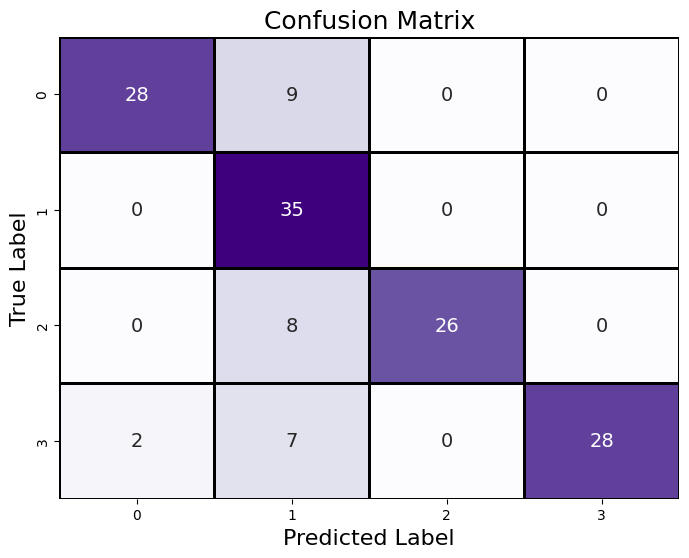

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Purples", cbar=False,
            annot_kws={"fontsize": 14}, linewidths=2, linecolor='black')

plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


6/6 [==============================] - 0s 17ms/step - loss: 0.3314 - accuracy: 0.8452
Test Loss: 0.33136600255966187
Test Accuracy: 0.8452380895614624


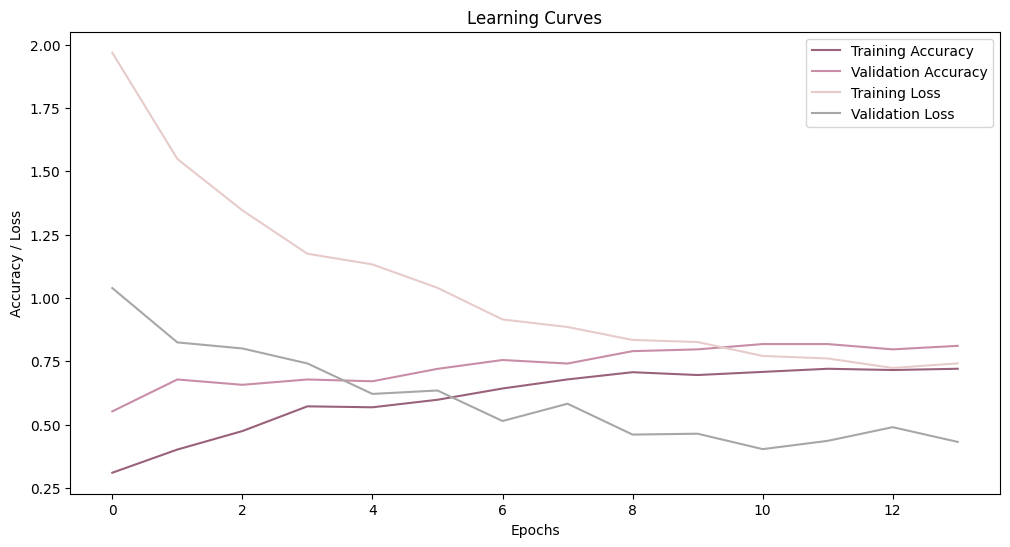

6/6 [==============================] - 0s 10ms/step


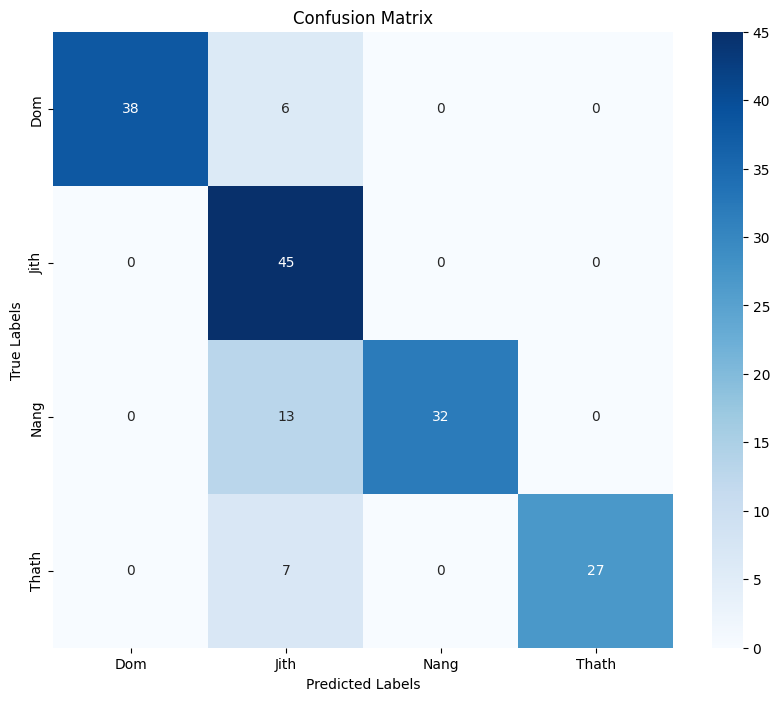

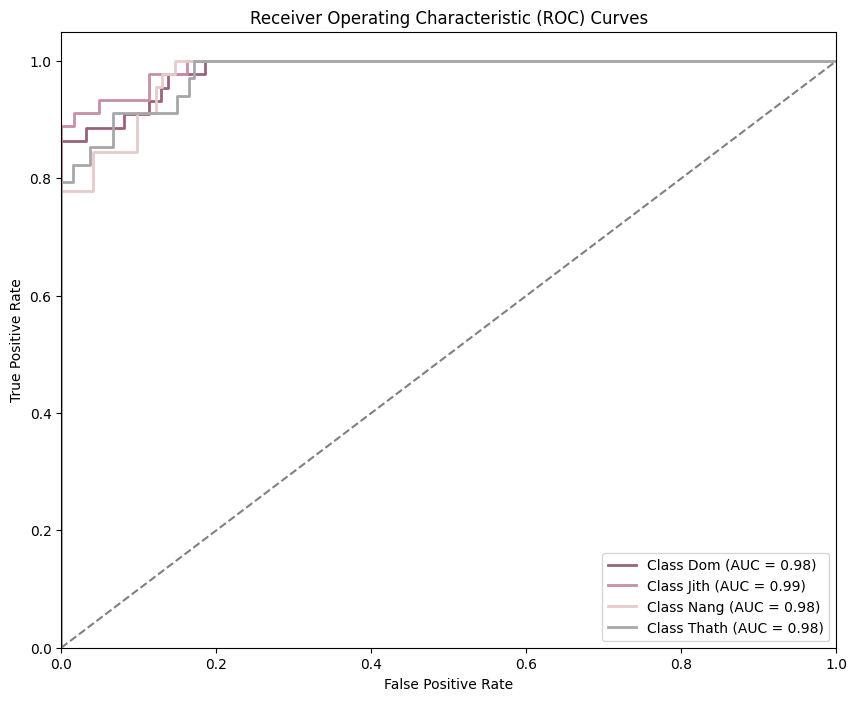

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

# Evaluate the model
test_loss, test_accuracy = model.evaluate(m_test, n_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], color='#99627A', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='#C88EA7', label='Validation Accuracy')
plt.plot(history.history['loss'], color='#E7CBCB', label='Training Loss')
plt.plot(history.history['val_loss'], color='#A7A7A7', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()

# Predictions
y_pred = model.predict(m_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(n_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
plt.figure(figsize=(10, 8))
colors = ['#99627A', '#C88EA7', '#E7CBCB', '#A7A7A7']
for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(n_test[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


6/6 [==============================] - 0s 13ms/step - loss: 0.3314 - accuracy: 0.8452
Test Loss: 0.33136600255966187
Test Accuracy: 0.8452380895614624
6/6 [==============================] - 0s 11ms/step


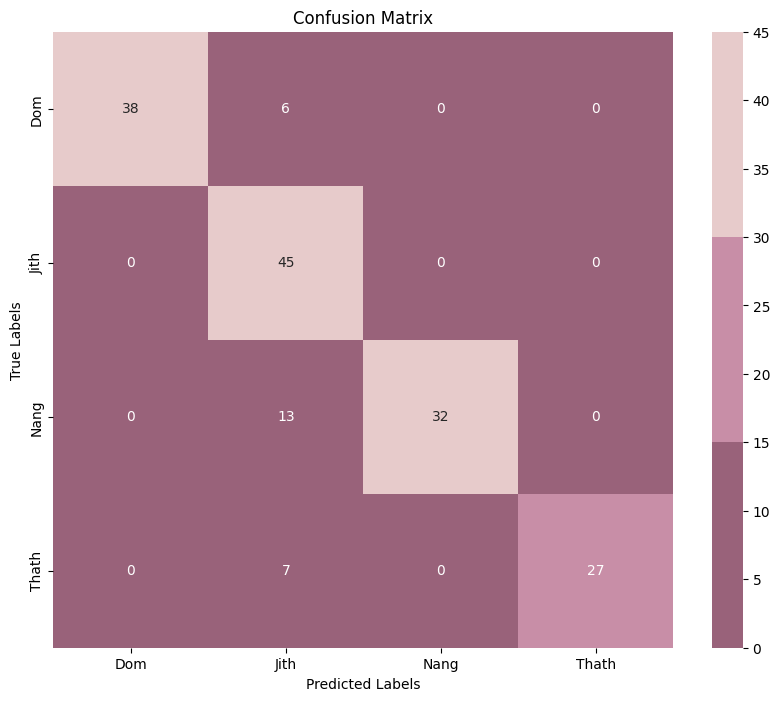

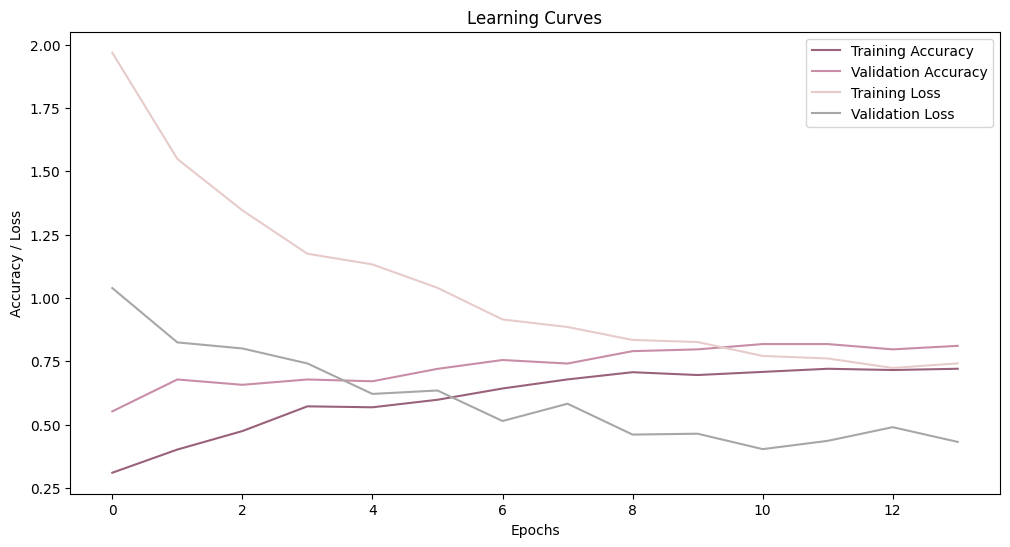

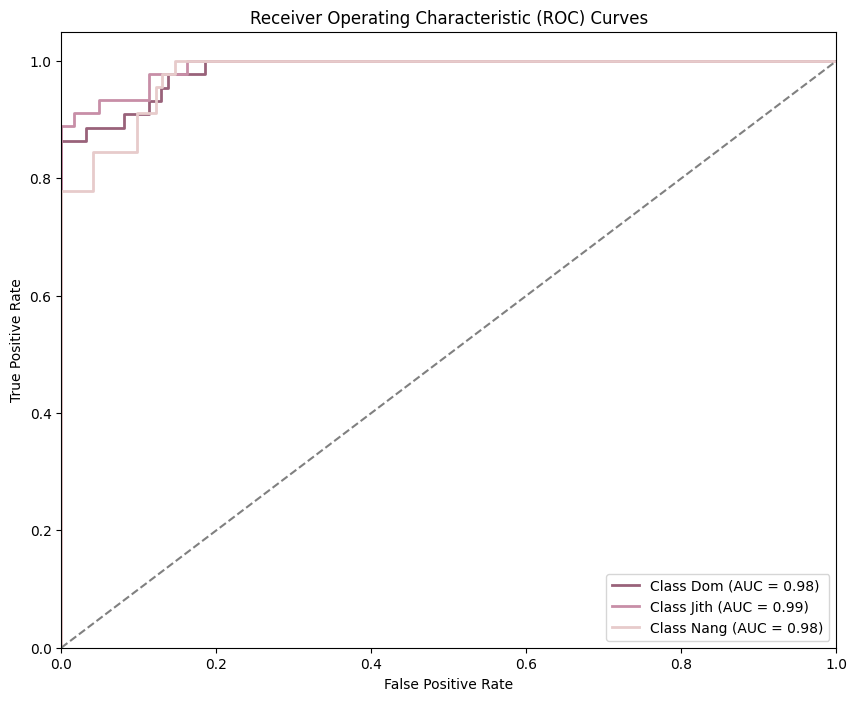

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Define custom colors
colors = ['#99627A', '#C88EA7', '#E7CBCB']
cmap = plt.get_cmap('Blues')  # Use the 'Blues' colormap as base
custom_cmap = sns.color_palette(colors, as_cmap=True)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(m_test, n_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predictions
y_pred = model.predict(m_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(n_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], color='#99627A', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='#C88EA7', label='Validation Accuracy')
plt.plot(history.history['loss'], color='#E7CBCB', label='Training Loss')
plt.plot(history.history['val_loss'], color='#A7A7A7', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(n_test[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


6/6 [==============================] - 0s 13ms/step - loss: 0.3314 - accuracy: 0.8452
Test Loss: 0.33136600255966187
Test Accuracy: 0.8452380895614624
6/6 [==============================] - 0s 11ms/step


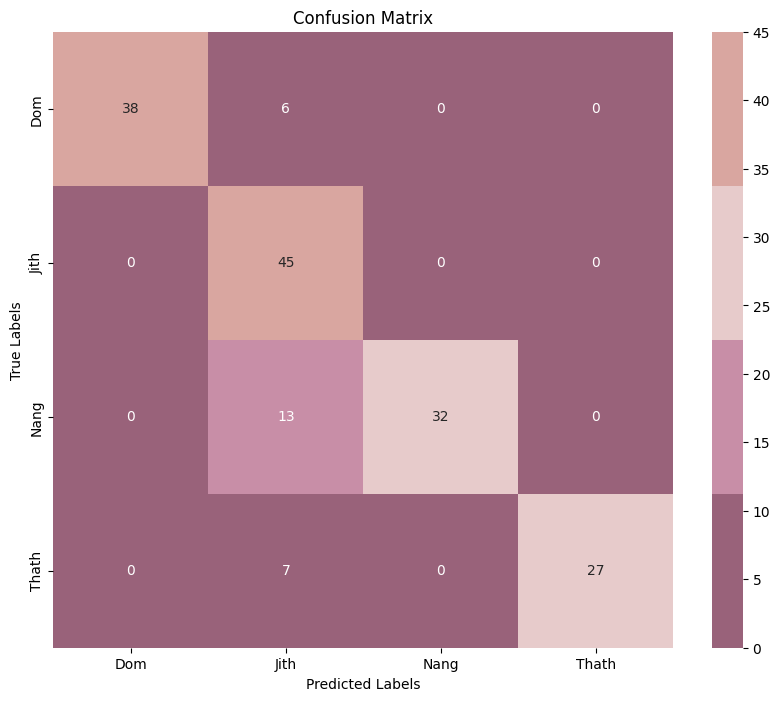

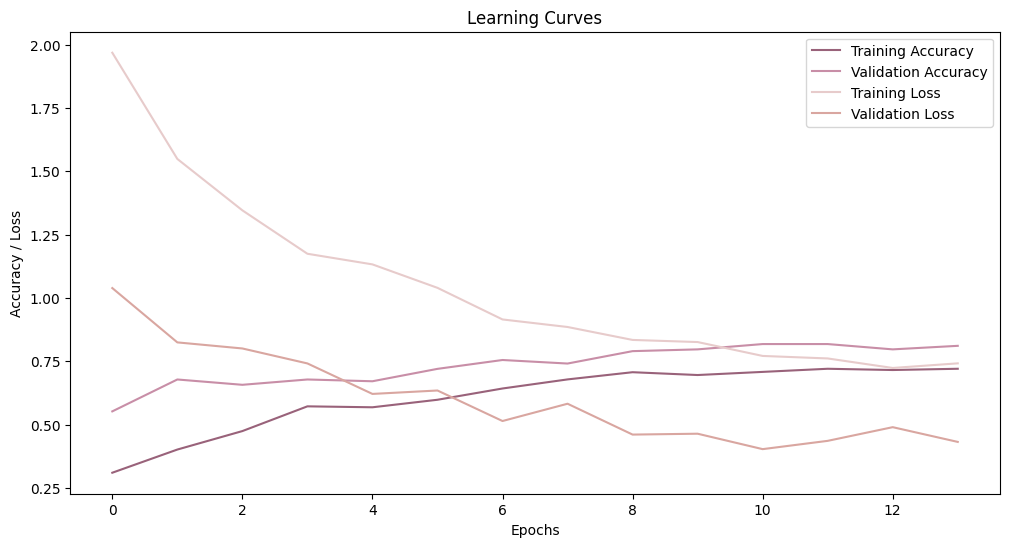

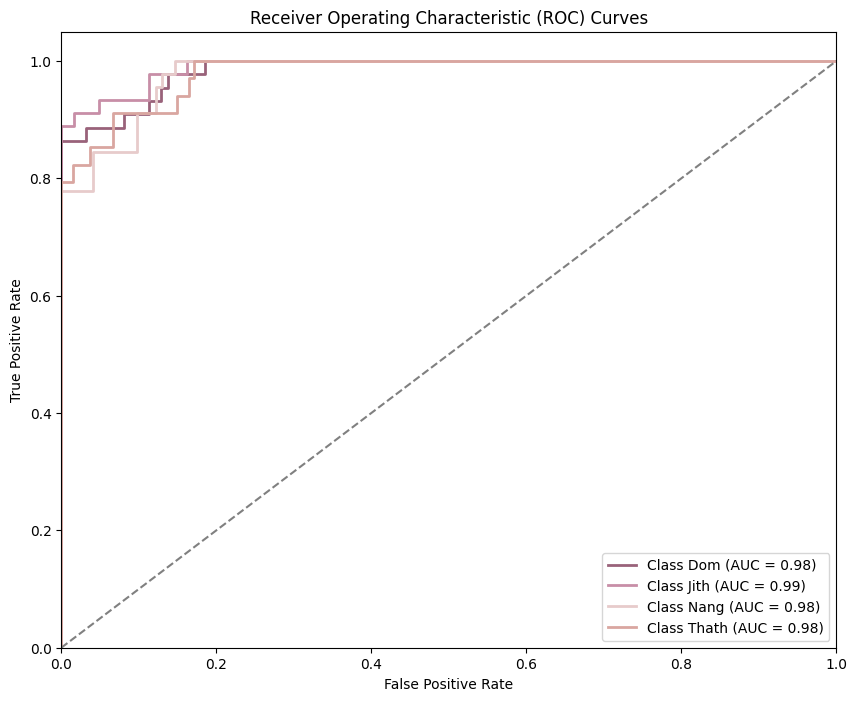

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Define custom colors
colors = ['#99627A', '#C88EA7', '#E7CBCB', '#D9A6A0']
custom_cmap = sns.color_palette(colors, as_cmap=True)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(m_test, n_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predictions
y_pred = model.predict(m_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(n_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], color='#99627A', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='#C88EA7', label='Validation Accuracy')
plt.plot(history.history['loss'], color='#E7CBCB', label='Training Loss')
plt.plot(history.history['val_loss'], color='#D9A6A0', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(n_test[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Save the model
model_save_path = '/content/gataberaya2.h5'
model.save(model_save_path)

print(f"Model saved as {model_save_path}")

Model saved as /content/gataberaya2.h5


In [ ]:
import numpy as np
import librosa
from keras.models import load_model

# Function to extract MFCC features from an audio file
def extract_features(file_path, max_pad_len=100):
    # Load audio file
    audio, sample_rate = librosa.load(file_path, sr=None)
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # Padding to ensure uniform length
    pad_width = max_pad_len - mfccs.shape[1]
    if pad_width > 0:
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_len]
    return mfccs.T  # Transpose to have the shape (max_pad_len, n_mfcc)
# Load your trained model
model_path = '/content/gataberaya2.h5'
# Path to the unseen audio file
unseen_audio_path = '/content/NANG1.wav'  # Update this path as needed
# Extract features from the unseen audio file
features = extract_features(unseen_audio_path)
# Reshape features to match input shape expected by the model
features_reshaped = features[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions
# Make a prediction
prediction = model.predict(features_reshaped)
# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)
# Map numerical class to instrument names
class_names = ['Thath', 'Jith', 'Dom', 'Nang']
predicted_label = class_names[predicted_class[0]]
model_path = '/content/gataberaya2.h5'
unseen_audio_path = '/content/NANG1.wav'
print(f"The predicted class for the unseen audio file is: {predicted_label}")

1/1 [==============================] - 0s 167ms/step
The predicted class for the unseen audio file is: Jith
